In [243]:
%matplotlib inline
import numpy as np
import scipy as sp
import matplotlib.pyplot as plt
plt.style.use('ggplot')

#### Load tables

In [244]:
# Names of calculating surface area accessibility
web_based_tools = ['DS', 'StructTools', 'GetArea', 'Mobyle']

# Code to upload .csv files with data
_1IYT_tot_solv_acc = np.loadtxt("Sol Acc - 1IYT TS1.csv",  usecols = (1,2,3,4), delimiter = ",")
_1IYT_conform = np.loadtxt("Sol Acc - 1IYT TS1.csv",  usecols = (0), delimiter = ",", dtype = str)

_1Z0Q_tot_solv_acc = np.loadtxt("Sol Acc - 1Z0Q TS2.csv",  usecols = (1,2,3,4), delimiter = ",")
_1Z0Q_conform = np.loadtxt("Sol Acc - 1Z0Q TS2.csv",  usecols = (0), delimiter = ",", dtype = str)

_1BA4_tot_solv_acc = np.loadtxt("Sol Acc - 1BA4 TS3.csv",  usecols = (1,2,3,4), delimiter = ",")
_1BA4_conform = np.loadtxt("Sol Acc - 1BA4 TS3.csv",  usecols = (0), delimiter = ",", dtype = str)

_2LFM_tot_solv_acc = np.loadtxt("Sol Acc - 2LFM TS4.csv",  usecols = (1,2,3,4), delimiter = ",")
_2LFM_conform = np.loadtxt("Sol Acc - 2LFM TS4.csv",  usecols = (0), delimiter = ",", dtype = str)

In [245]:
# Code to upload .csv files with data for hydrophobic and hydrophilic SAS areas
_1IYT_hydro_SAS = np.loadtxt("Hydro - 1IYT TS5.csv",  usecols = (1,2), delimiter = ",")

_1Z0Q_hydro_SAS = np.loadtxt("Hydro - 1Z0Q TS6.csv",  usecols = (1,2), delimiter = ",")

_1BA4_hydro_SAS = np.loadtxt("Hydro - 1BA4 TS7.csv",  usecols = (1,2), delimiter = ",")

_2LFM_hydro_SAS = np.loadtxt("Hydro - 2LFM TS8.csv",  usecols = (1,2), delimiter = ",")

In [246]:
# Code to upload .csv files with data for t_onset and conformation properties
_1IYT_t_onset_and_prop = np.loadtxt("t_o and prop - 1IYT TS11.csv",  usecols = (1,2,3,4), delimiter = ",")

_1Z0Q_t_onset_and_prop = np.loadtxt("t_o and prop - 1Z0Q TS12.csv",  usecols = (1,2,3,4), delimiter = ",")

_1BA4_t_onset_and_prop = np.loadtxt("t_o and prop - 1BA4 TS13.csv",  usecols = (1,2,3,4), delimiter = ",")

_2LFM_t_onset_and_prop = np.loadtxt("t_o and prop - 2LFM TS14.csv",  usecols = (1,2,3,4), delimiter = ",")

In [247]:
# Code to upload .csv files with data for total AB and conformation properties
_1IYT_tot_AB_and_prop = np.loadtxt("tot AB and prop - 1IYT TS16.csv",  usecols = (1,2,3,4), delimiter = ",")

_1Z0Q_tot_AB_and_prop = np.loadtxt("tot AB and prop - 1Z0Q TS17.csv",  usecols = (1,2,3,4), delimiter = ",")

_1BA4_tot_AB_and_prop = np.loadtxt("tot AB and prop - 1BA4 TS18.csv",  usecols = (1,2,3,4), delimiter = ",")

_2LFM_tot_AB_and_prop = np.loadtxt("tot AB and prop - 2LFM TS19.csv",  usecols = (1,2,3,4), delimiter = ",")

#### Function for aligning data from tables

In [248]:
def rearrange_data(array, first_point, second_point, third_point):
    new_data = []
    for i in range(len(array)):
        new_data.append(array[i])
        
    new_data.append(first_point)
    new_data.append(second_point)
    new_data.append(third_point)
    
    
    return np.asarray(new_data)

#### Create subsets of data

In [249]:
# Create subsets 
_1IYT_hydrophobic_SAS = _1IYT_hydro_SAS[:, 0]
_1Z0Q_hydrophobic_SAS = _1Z0Q_hydro_SAS[:, 0]

_1IYT_t_onset = _1IYT_t_onset_and_prop[:, 0]
_1IYT_hydrophilic_SAS_2 = _1IYT_t_onset_and_prop[:, 3]

_1Z0Q_t_onset = _1Z0Q_t_onset_and_prop[:, 0]
_1Z0Q_hydrophilic_SAS_2 = _1Z0Q_t_onset_and_prop[:, 3]

_1BA4_t_onset = _1BA4_t_onset_and_prop[:, 0]
_1BA4_hydrophilic_SAS_2 = _1BA4_t_onset_and_prop[:, 3]

_2LFM_t_onset = _2LFM_t_onset_and_prop[:, 0]
_2LFM_hydrophilic_SAS_2 = _2LFM_t_onset_and_prop[:, 3]

_1BA4_hydrophobic_SAS = _1BA4_hydro_SAS[:, 0]
_2LFM_hydrophobic_SAS = _2LFM_hydro_SAS[:, 0]

In [250]:
#Create subsets
_1IYT_total_AB = _1IYT_tot_AB_and_prop[:, 0]
_1IYT_hydrophilic_SAS = _1IYT_tot_AB_and_prop[:, 3]

_1Z0Q_total_AB = _1Z0Q_tot_AB_and_prop[:, 0]
_1Z0Q_hydrophilic_SAS = _1Z0Q_tot_AB_and_prop[:, 3]

_1BA4_total_AB = _1BA4_tot_AB_and_prop[:, 0]
_1BA4_hydrophilic_SAS = _1BA4_tot_AB_and_prop[:, 3]

_2LFM_total_AB = _2LFM_tot_AB_and_prop[:, 0]
_2LFM_hydrophilic_SAS = _2LFM_tot_AB_and_prop[:, 3]

#### Define functions we will use throughout project. 

In [251]:
# Define function for guessing linear parameters
def generate_linear_params(x_GLP, y_GLP):
    
    assert(len(x_GLP) == len(y_GLP))
    
    x_inital_GLP, x_final_GLP = x_GLP[0], x_GLP[len(x_GLP)-1]
    y_inital_GLP, y_final_GLP = y_GLP[0], y_GLP[len(y_GLP)-1]
    
    slope = (y_final_GLP - y_inital_GLP)/(x_final_GLP - x_inital_GLP)
    y_int = y_final_GLP - slope * x_final_GLP
    
    return np.array([slope, y_int])
    
x_dummy = np.linspace(0, 100)

assert(generate_linear_params(x_dummy, x_dummy)[0] == 1)
assert(generate_linear_params(x_dummy, x_dummy)[1] == 0)

In [252]:
# Linear model will have the form y = ax + b, where beta = [a, b]
from scipy.optimize import leastsq

# Define function to calculate model output
def generate_linear_y(x_GLY, params_GLY):
    y_model_GLY = params_GLY[0] * x_GLY + params_GLY[1]
    
    return y_model_GLY

guess_params_dummy = [1, 0]
x_dummy = np.linspace(-100, 100, 201)
y_dummy = generate_linear_y(x_dummy, guess_params_dummy)
assert(np.all(x_dummy == y_dummy))

# Define residuals function
def residuals_OLS(params_ROLS, x_ROLS, y_ROLS):
    y_model_ROLS = generate_linear_y(x_ROLS, params_ROLS) #params_ROLS = [slope, y-int]
    
    return (y_model_ROLS - y_ROLS)

assert(np.sum(residuals_OLS(guess_params_dummy, x_dummy, y_dummy)) == 0)

# Write function for applying least squares that returns optimal beta
def least_sq(residuals_LS, params_LS, args_LS):
    lSqVals = leastsq(residuals_LS, params_LS, args = args_LS)
    return lSqVals[0]

assert(np.all(least_sq(residuals_OLS, guess_params_dummy, args_LS = (x_dummy, y_dummy)) == guess_params_dummy))

# Define function to return y values of model and beta values
def generate_linear_model(x_GLM, y_GLM, guess_params_GLM, residuals_GLM):
    beta_GLM = least_sq(residuals_GLM, guess_params_GLM, args_LS = (x_GLM, y_GLM))
    y_model_GLM = generate_linear_y(x_GLM, beta_GLM)
    
    return beta_GLM

assert(np.all(generate_linear_y(x_dummy, generate_linear_model(x_dummy, y_dummy, guess_params_dummy, residuals_OLS)) == y_dummy))

In [253]:
def R2_(modX, obsX):
    sumSqEr =  np.sum(np.square(np.subtract(obsX, modX)))
#     sumSqObs = np.sum(np.square(np.subtract(obsX, np.mean(obsX))))
    sumSqObs = np.sum(np.square(obsX))
    R2_Val = 1 - sumSqEr / sumSqObs
    
    return R2_Val

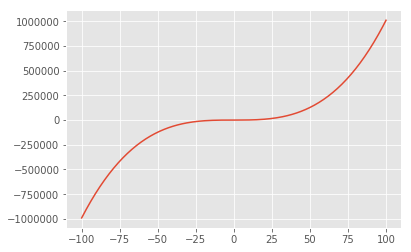

In [254]:
# Create a function for generating a cubic model
def generate_cubic_y(x_GCY, params_GCY):
    y_model_GCY = params_GCY[0] * x_GCY ** 3 + params_GCY[1] * x_GCY ** 2 + params_GCY[2] * x_GCY + params_GCY[3]
    
    return y_model_GCY

guess_params_dummy = [1, 1, 1, 1]
y_dummy = x_dummy ** 3 + x_dummy ** 2 + x_dummy + 1
assert(np.all(generate_cubic_y(x_dummy, guess_params_dummy) == y_dummy))

# Create function for calculating residuals of cubic function
def residuals_CLS(params_RCLS, x_RCLS, y_RCLS):
    y_model_RCLS = generate_cubic_y(x_RCLS, params_RCLS) # params_RCLS = [a, b, c, d]
    
    return (y_model_RCLS - y_RCLS)

assert(np.sum(residuals_CLS(guess_params_dummy, x_dummy, y_dummy)) == 0)

# Define function to return y values of model and beta values
def generate_cubic_model(x_GCM, y_GCM, guess_params_GCM, residuals_GCM):
    beta_GCM = least_sq(residuals_GCM, guess_params_GCM, args_LS = (x_GCM, y_GCM))
    y_model_GCM = generate_cubic_y(x_GCM, beta_GCM)
    
    return beta_GCM
    
assert(np.all(generate_cubic_y(x_dummy, generate_cubic_model(x_dummy, y_dummy, guess_params_dummy, residuals_CLS)) == y_dummy)) 

cubic_model_dummy = generate_cubic_model(x_dummy, y_dummy, guess_params_dummy, residuals_CLS)
plt.plot(x_dummy, generate_cubic_y(x_dummy, cubic_model_dummy))
plt.show()

In [255]:
# Create a function for generating a multivariable model
def generate_multivar_y(x1_GMY, x2_GMY, x3_GMY, params_GMY):
    y_model_GMY = params_GMY[0] * x1_GMY + params_GMY[1] * x2_GMY + params_GMY[2] * x3_GMY + params_GMY[3] 
    
    return y_model_GMY

guess_params_dummy = [1, 1, 1, 0]
y_dummy = x_dummy + x_dummy + x_dummy
assert(np.all(generate_multivar_y(x_dummy, x_dummy, x_dummy, guess_params_dummy) == y_dummy))

# Create function for calculating residuals of cubic function
def residuals_MLS(params_RMLS, x1_RMLS, x2_RMLS, x3_RMLS, y_RMLS):
    y_model_RMLS = generate_multivar_y(x1_RMLS, x2_RMLS, x3_RMLS, params_RMLS) # params_RCLS = [a, b, c]
    
    return (y_model_RMLS - y_RMLS)

assert(np.sum(residuals_MLS(guess_params_dummy, x_dummy, x_dummy, x_dummy, y_dummy)) == 0)

# Define function to return y values of model and beta values
def generate_multivar_model(x1_GMM, x2_GMM, x3_GMM, y_GMM, guess_params_GMM, residuals_GMM):
    beta_GMM = least_sq(residuals_GMM, guess_params_GMM, args_LS = (x1_GMM, x2_GMM, x3_GMM, y_GMM))
    y_model_GMM = generate_multivar_y(x1_GMM, x2_GMM, x3_GMM, beta_GMM)
    
    return beta_GMM
    
assert(np.all(generate_multivar_y(x_dummy, x_dummy, x_dummy, generate_multivar_model(x_dummy, x_dummy, x_dummy, y_dummy, guess_params_dummy, residuals_MLS)) == y_dummy)) 

multivar_model_dummy = generate_multivar_model(x_dummy, x_dummy, x_dummy, y_dummy, guess_params_dummy, residuals_MLS)
print(multivar_model_dummy)
print(generate_multivar_y(x_dummy, x_dummy, x_dummy, multivar_model_dummy))

[1. 1. 1. 0.]
[-300. -297. -294. -291. -288. -285. -282. -279. -276. -273. -270. -267.
 -264. -261. -258. -255. -252. -249. -246. -243. -240. -237. -234. -231.
 -228. -225. -222. -219. -216. -213. -210. -207. -204. -201. -198. -195.
 -192. -189. -186. -183. -180. -177. -174. -171. -168. -165. -162. -159.
 -156. -153. -150. -147. -144. -141. -138. -135. -132. -129. -126. -123.
 -120. -117. -114. -111. -108. -105. -102.  -99.  -96.  -93.  -90.  -87.
  -84.  -81.  -78.  -75.  -72.  -69.  -66.  -63.  -60.  -57.  -54.  -51.
  -48.  -45.  -42.  -39.  -36.  -33.  -30.  -27.  -24.  -21.  -18.  -15.
  -12.   -9.   -6.   -3.    0.    3.    6.    9.   12.   15.   18.   21.
   24.   27.   30.   33.   36.   39.   42.   45.   48.   51.   54.   57.
   60.   63.   66.   69.   72.   75.   78.   81.   84.   87.   90.   93.
   96.   99.  102.  105.  108.  111.  114.  117.  120.  123.  126.  129.
  132.  135.  138.  141.  144.  147.  150.  153.  156.  159.  162.  165.
  168.  171.  174.  177.  180.  183. 

#### --------------------------------
#### Reproducing Figure 2 from Paper
#### ---------------------------------

In [256]:
# Figure 2a
_1IYT_hydrophobic_SAS_subset_1 = _1IYT_hydrophobic_SAS[0:11]
_1IYT_t_onset_subset_1 = _1IYT_t_onset[0:11]

_1IYT_hydrophobic_SAS_E22K = _1IYT_hydrophobic_SAS[10]
_1IYT_t_onset_E22K = _1IYT_t_onset[11]

_1IYT_hydrophobic_SAS_E22Q = _1IYT_hydrophobic_SAS[11]
_1IYT_t_onset_E22Q = _1IYT_t_onset[10]

_1IYT_hydrophobic_SAS_D23N = _1IYT_hydrophobic_SAS[12]
_1IYT_t_onset_D23N = _1IYT_t_onset[12]

#Combine all x and y points
AllHydrophobicSASFig2a = rearrange_data(_1IYT_hydrophobic_SAS_subset_1, _1IYT_hydrophobic_SAS_E22K, _1IYT_hydrophobic_SAS_E22Q, _1IYT_hydrophobic_SAS_D23N)
AllTOnsetFig2a = rearrange_data(_1IYT_t_onset_subset_1, _1IYT_t_onset_E22K, _1IYT_t_onset_E22Q, _1IYT_t_onset_D23N)


# Figure 2b
_1Z0Q_hydrophobic_SAS_subset_1 = _1Z0Q_hydrophobic_SAS[0:10]
_1Z0Q_t_onset_subset_1 = _1Z0Q_t_onset[0:10]

_1Z0Q_hydrophobic_SAS_E22K = _1Z0Q_hydrophobic_SAS[10]
_1Z0Q_t_onset_E22K = _1Z0Q_t_onset[11]

_1Z0Q_hydrophobic_SAS_E22Q = _1Z0Q_hydrophobic_SAS[11]
_1Z0Q_t_onset_E22Q = _1Z0Q_t_onset[10]

_1Z0Q_hydrophobic_SAS_D23N = _1Z0Q_hydrophobic_SAS[12]
_1Z0Q_t_onset_D23N = _1Z0Q_t_onset[12]

#Combine all x and y points
AllHydrophobicSASFig2b = rearrange_data(_1Z0Q_hydrophobic_SAS_subset_1, _1Z0Q_hydrophobic_SAS_E22K, _1Z0Q_hydrophobic_SAS_E22Q, _1Z0Q_hydrophobic_SAS_D23N)
AllTOnsetFig2b = rearrange_data(_1Z0Q_t_onset_subset_1, _1Z0Q_t_onset_E22K, _1Z0Q_t_onset_E22Q, _1Z0Q_t_onset_D23N)


# Figure 2c
_1BA4_hydrophobic_SAS_subset_1 = _1BA4_hydrophobic_SAS[0:10]
_1BA4_t_onset_subset_1 = _1BA4_t_onset[0:10]

_1BA4_hydrophobic_SAS_E22K = _1BA4_hydrophobic_SAS[10]
_1BA4_t_onset_E22K = _1BA4_t_onset[11]

_1BA4_hydrophobic_SAS_E22Q = _1BA4_hydrophobic_SAS[11]
_1BA4_t_onset_E22Q = _1BA4_t_onset[10]

_1BA4_hydrophobic_SAS_D23N = _1BA4_hydrophobic_SAS[12]
_1BA4_t_onset_D23N = _1BA4_t_onset[12]

#Combine all x and y points
AllHydrophobicSASFig2c = rearrange_data(_1BA4_hydrophobic_SAS_subset_1, _1BA4_hydrophobic_SAS_E22K, _1BA4_hydrophobic_SAS_E22Q, _1BA4_hydrophobic_SAS_D23N)
AllTOnsetFig2c = rearrange_data(_1BA4_t_onset_subset_1, _1BA4_t_onset_E22K, _1BA4_t_onset_E22Q, _1BA4_t_onset_D23N)


# Figure 2d
_2LFM_hydrophobic_SAS_subset_1 = _2LFM_hydrophobic_SAS[0:10]
_2LFM_t_onset_subset_1 = _2LFM_t_onset[0:10]

_2LFM_hydrophobic_SAS_E22K = _2LFM_hydrophobic_SAS[10]
_2LFM_t_onset_E22K = _2LFM_t_onset[11]

_2LFM_hydrophobic_SAS_E22Q = _2LFM_hydrophobic_SAS[11]
_2LFM_t_onset_E22Q = _2LFM_t_onset[10]

_2LFM_hydrophobic_SAS_D23N = _2LFM_hydrophobic_SAS[12]
_2LFM_t_onset_D23N = _2LFM_t_onset[12]

#Combine all x and y points
AllHydrophobicSASFig2d = rearrange_data(_2LFM_hydrophobic_SAS_subset_1, _2LFM_hydrophobic_SAS_E22K, _2LFM_hydrophobic_SAS_E22Q, _2LFM_hydrophobic_SAS_D23N)
AllTOnsetFig2d = rearrange_data(_2LFM_t_onset_subset_1, _2LFM_t_onset_E22K, _2LFM_t_onset_E22Q, _2LFM_t_onset_D23N)

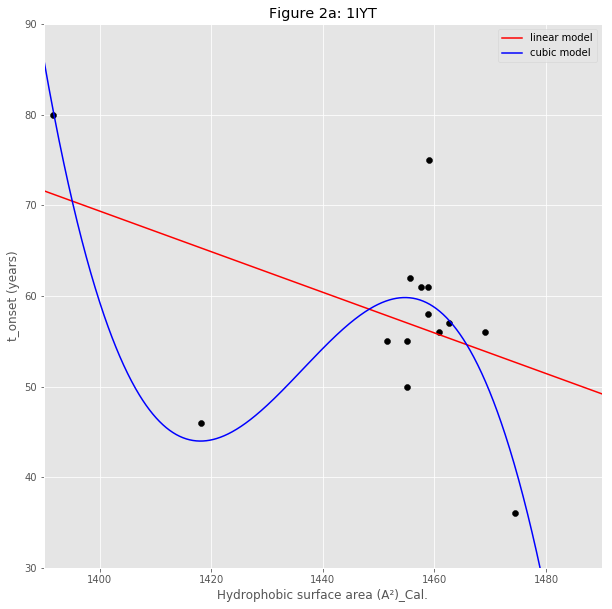

In [257]:
#Figure 2a
x_limits_fig_2a = [1390, 1490]
x_fig_2a = np.linspace(x_limits_fig_2a[0], x_limits_fig_2a[1], 1000)

#Plot data
plt.figure(figsize = (10, 10))
plt.scatter(AllHydrophobicSASFig2a, AllTOnsetFig2a, c = 'k')

# Generate Linear Model
guess_params_linear_fig_2a = generate_linear_params(AllHydrophobicSASFig2a, AllTOnsetFig2a)
linear_model_fig_2a = generate_linear_model(AllHydrophobicSASFig2a, AllTOnsetFig2a, guess_params_linear_fig_2a, residuals_OLS)

# Generate cubic model
guess_params_cubic_fig_2a = [-1, 1, 1, 1]
cubic_model_fig_2a = generate_cubic_model(AllHydrophobicSASFig2a, AllTOnsetFig2a, guess_params_cubic_fig_2a, residuals_CLS)       

# Plot Models
plt.plot(x_fig_2a, generate_linear_y(x_fig_2a, linear_model_fig_2a), c = 'r', label = 'linear model')
plt.plot(x_fig_2a, generate_cubic_y(x_fig_2a, cubic_model_fig_2a), c = 'b', label = 'cubic model')

#Set axis limits
axis = plt.gca()
axis.set_xlim(x_limits_fig_2a)
axis.set_ylim([30,90])

#Labels
plt.title('Figure 2a: 1IYT')
plt.xlabel('Hydrophobic surface area (A²)_Cal.')
plt.ylabel('t_onset (years)')
plt.legend()

plt.show()

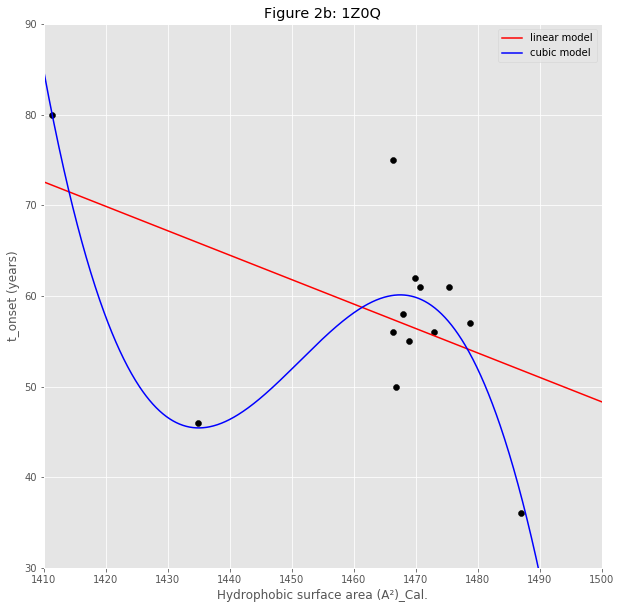

In [258]:
#Figure 2b
x_limits_fig_2b = [1410,1500]
x_fig_2b = np.linspace(x_limits_fig_2b[0], x_limits_fig_2b[1], 1000)

#Plot data
plt.figure(figsize = (10, 10))
plt.scatter(AllHydrophobicSASFig2b, AllTOnsetFig2b, c = 'k')

# Generate Linear Model
guess_params_linear_fig_2b = generate_linear_params(AllHydrophobicSASFig2b, AllTOnsetFig2b)
linear_model_fig_2b = generate_linear_model(AllHydrophobicSASFig2b, AllTOnsetFig2b, guess_params_linear_fig_2b, residuals_OLS)

# Generate Cubic Model
guess_params_cubic_fig_2b = [-1, 1, 1, 1]
cubic_model_fig_2b = generate_cubic_model(AllHydrophobicSASFig2b, AllTOnsetFig2b, guess_params_cubic_fig_2b, residuals_CLS)

# Plot Models
plt.plot(x_fig_2b, generate_linear_y(x_fig_2b, linear_model_fig_2b), c = 'r', label = 'linear model')
plt.plot(x_fig_2b, generate_cubic_y(x_fig_2b, cubic_model_fig_2b), c = 'b', label = 'cubic model')

#Set axis limits
axis = plt.gca()
axis.set_xlim(x_limits_fig_2b)
axis.set_ylim([30,90])

#Labels
plt.title('Figure 2b: 1Z0Q')
plt.xlabel('Hydrophobic surface area (A²)_Cal.')
plt.ylabel('t_onset (years)')
plt.legend()

plt.show()

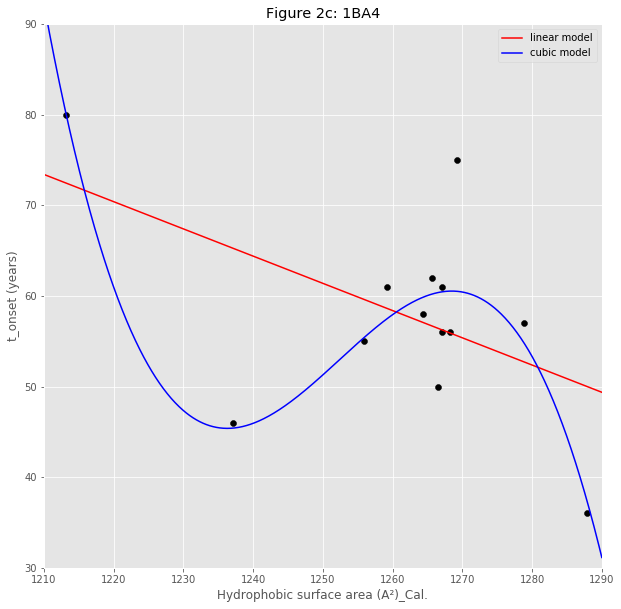

In [259]:
#Figure 2c
x_limits_fig_2c = [1210, 1290]
x_fig_2c = np.linspace(x_limits_fig_2c[0], x_limits_fig_2c[1], 1000)

#Plot data
plt.figure(figsize = (10, 10))
plt.scatter(AllHydrophobicSASFig2c, AllTOnsetFig2c, c = 'k')

# Generate Linear Model
guess_params_linear_fig_2c = generate_linear_params(AllHydrophobicSASFig2c, AllTOnsetFig2c)
linear_model_fig_2c = generate_linear_model(AllHydrophobicSASFig2c, AllTOnsetFig2c, guess_params_linear_fig_2c, residuals_OLS)

# Generate Cubic Model
guess_params_cubic_fig_2c = [-1, 1, 1, 1]
cubic_model_fig_2c = generate_cubic_model(AllHydrophobicSASFig2c, AllTOnsetFig2c, guess_params_cubic_fig_2c, residuals_CLS)

# Plot Models
plt.plot(x_fig_2c, generate_linear_y(x_fig_2c, linear_model_fig_2c), c = 'r', label = 'linear model')
plt.plot(x_fig_2c, generate_cubic_y(x_fig_2c, cubic_model_fig_2c), c = 'b', label = 'cubic model')

#Set axis limits
axis = plt.gca()
axis.set_xlim(x_limits_fig_2c)
axis.set_ylim([30,90])

#Labels
plt.title('Figure 2c: 1BA4')
plt.xlabel('Hydrophobic surface area (A²)_Cal.')
plt.ylabel('t_onset (years)')
plt.legend()

plt.show()

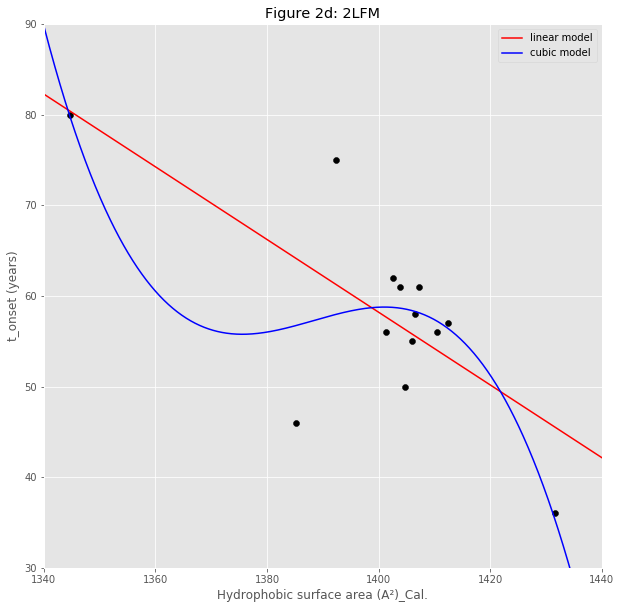

In [260]:
#Figure 2d
x_limits_fig_2d = [1340, 1440]
x_fig_2d = np.linspace(x_limits_fig_2d[0], x_limits_fig_2d[1], 1000)

#Plot data
plt.figure(figsize = (10, 10))
plt.scatter(AllHydrophobicSASFig2d, AllTOnsetFig2d, c = 'k')

# Generate Linear Model
guess_params_linear_fig_2d = generate_linear_params(AllHydrophobicSASFig2d, AllTOnsetFig2d)
linear_model_fig_2d = generate_linear_model(AllHydrophobicSASFig2d, AllTOnsetFig2d, guess_params_linear_fig_2d, residuals_OLS)

# Generate Cubic Model
guess_params_cubic_fig_2d = [-1, 1, 1, 1]
cubic_model_fig_2d = generate_cubic_model(AllHydrophobicSASFig2d, AllTOnsetFig2d, guess_params_cubic_fig_2d, residuals_CLS)

# Plot Models
plt.plot(x_fig_2d, generate_linear_y(x_fig_2d, linear_model_fig_2d), c = 'r', label = 'linear model')
plt.plot(x_fig_2d, generate_cubic_y(x_fig_2d, cubic_model_fig_2d), c = 'b', label = 'cubic model')

# Set axis limits
axis = plt.gca()
axis.set_xlim(x_limits_fig_2d)
axis.set_ylim([30,90])

# Labels
plt.title('Figure 2d: 2LFM')
plt.legend()
plt.xlabel('Hydrophobic surface area (A²)_Cal.')
plt.ylabel('t_onset (years)')

plt.show()

#### -----------------------------
#### Reproducing Figure 3 from Paper
#### ---------------------------

In [261]:
# Rearrange Data

# Figure 3a
_1IYT_total_AB_subset_1 = _1IYT_total_AB[0:10]
_1IYT_hydrophobic_SAS_subset_1 = _1IYT_hydrophobic_SAS[0:10]

_1IYT_total_AB_E22K = _1IYT_total_AB[11]
_1IYT_hydrophobic_SAS_E22K = _1IYT_hydrophobic_SAS[10]

_1IYT_total_AB_E22Q = _1IYT_total_AB[10]
_1IYT_hydrophobic_SAS_E22Q = _1IYT_hydrophobic_SAS[11]

_1IYT_total_AB_D23N = _1IYT_total_AB[12]
_1IYT_hydrophobic_SAS_D23N = _1IYT_hydrophobic_SAS[12]

#Combine all x and y points
AllHydrophobicSASFig3a = rearrange_data(_1IYT_hydrophobic_SAS_subset_1, _1IYT_hydrophobic_SAS_E22K, _1IYT_hydrophobic_SAS_E22Q, _1IYT_hydrophobic_SAS_D23N)
AllTotalABFig3a = rearrange_data(_1IYT_total_AB_subset_1, _1IYT_total_AB_E22K, _1IYT_total_AB_E22Q, _1IYT_total_AB_D23N)

# Figure 3b
_1Z0Q_hydrophobic_SAS_subset_1 = _1Z0Q_hydrophobic_SAS[0:10]
_1Z0Q_total_AB_subset_1 = _1Z0Q_total_AB[0:10]

_1Z0Q_hydrophobic_SAS_E22K = _1Z0Q_hydrophobic_SAS[10]
_1Z0Q_total_AB_E22K = _1Z0Q_total_AB[11]

_1Z0Q_hydrophobic_SAS_E22Q = _1Z0Q_hydrophobic_SAS[11]
_1Z0Q_total_AB_E22Q = _1Z0Q_total_AB[10]

_1Z0Q_hydrophobic_SAS_D23N = _1Z0Q_hydrophobic_SAS[12]
_1Z0Q_total_AB_D23N = _1Z0Q_total_AB[12]

#Combine all x and y points
AllHydrophobicSASFig3b = rearrange_data(_1Z0Q_hydrophobic_SAS_subset_1, _1Z0Q_hydrophobic_SAS_E22K, _1Z0Q_hydrophobic_SAS_E22Q, _1Z0Q_hydrophobic_SAS_D23N)
AllTotalABFig3b = rearrange_data(_1Z0Q_total_AB_subset_1, _1Z0Q_total_AB_E22K, _1Z0Q_total_AB_E22Q, _1Z0Q_total_AB_D23N)

# Figure 3c
_1BA4_hydrophobic_SAS_subset_1 = _1BA4_hydrophobic_SAS[0:10]
_1BA4_total_AB_subset_1 = _1BA4_total_AB[0:10]

_1BA4_hydrophobic_SAS_E22K = _1BA4_hydrophobic_SAS[10]
_1BA4_total_AB_E22K = _1BA4_total_AB[11]

_1BA4_hydrophobic_SAS_E22Q = _1BA4_hydrophobic_SAS[11]
_1BA4_total_AB_E22Q = _1BA4_total_AB[10]

_1BA4_hydrophobic_SAS_D23N = _1BA4_hydrophobic_SAS[12]
_1BA4_total_AB_D23N = _1BA4_total_AB[12]

#Combine all x and y points
AllHydrophobicSASFig3c = rearrange_data(_1BA4_hydrophobic_SAS_subset_1, _1BA4_hydrophobic_SAS_E22K, _1BA4_hydrophobic_SAS_E22Q, _1BA4_hydrophobic_SAS_D23N)
AllTotalABFig3c = rearrange_data(_1BA4_total_AB_subset_1, _1BA4_total_AB_E22K, _1BA4_total_AB_E22Q, _1BA4_total_AB_D23N)

# Figure 3d
_2LFM_hydrophobic_SAS_subset_1 = _2LFM_hydrophobic_SAS[0:10]
_2LFM_total_AB_subset_1 = _2LFM_total_AB[0:10]

_2LFM_hydrophobic_SAS_E22K = _2LFM_hydrophobic_SAS[10]
_2LFM_total_AB_E22K = _2LFM_total_AB[11]

_2LFM_hydrophobic_SAS_E22Q = _2LFM_hydrophobic_SAS[11]
_2LFM_total_AB_E22Q = _2LFM_total_AB[10]

_2LFM_hydrophobic_SAS_D23N = _2LFM_hydrophobic_SAS[12]
_2LFM_total_AB_D23N = _2LFM_total_AB[12]

#Combine all x and y points
AllHydrophobicSASFig3d = rearrange_data(_2LFM_hydrophobic_SAS_subset_1, _2LFM_hydrophobic_SAS_E22K, _2LFM_hydrophobic_SAS_E22Q, _2LFM_hydrophobic_SAS_D23N)
AllTotalABFig3d = rearrange_data(_2LFM_total_AB_subset_1, _2LFM_total_AB_E22K, _2LFM_total_AB_E22Q, _2LFM_total_AB_D23N)



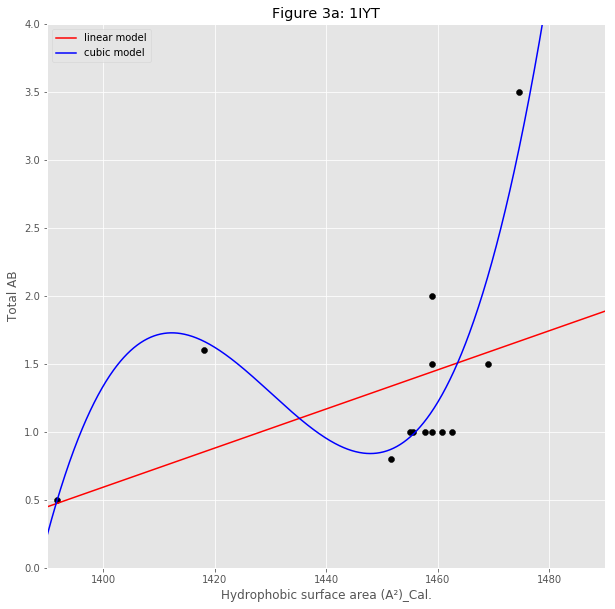

In [262]:
#Figure 3a
x_limits_fig_3a = [1390,1490]
x_fig_3a = np.linspace(x_limits_fig_3a[0], x_limits_fig_3a[1], 1000)

#Plot data
plt.figure(figsize = (10, 10))
plt.scatter(AllHydrophobicSASFig3a, AllTotalABFig3a, c = 'k')

# Generate Linear Model
guess_params_linear_fig_3a = generate_linear_params(AllHydrophobicSASFig3a, AllTotalABFig3a)
linear_model_fig_3a = generate_linear_model(AllHydrophobicSASFig3a, AllTotalABFig3a, guess_params_linear_fig_3a, residuals_OLS)

# Generate Cubic Model
guess_params_cubic_fig_3a = [1, 1, 1, 1]
cubic_model_fig_3a = generate_cubic_model(AllHydrophobicSASFig3a, AllTotalABFig3a, guess_params_cubic_fig_3a, residuals_CLS)

# Plot Models
plt.plot(x_fig_3a, generate_linear_y(x_fig_3a, linear_model_fig_3a), c = 'r', label = 'linear model')
plt.plot(x_fig_3a, generate_cubic_y(x_fig_3a, cubic_model_fig_3a), c = 'b', label = 'cubic model')

#Set axis limits
axis = plt.gca()
axis.set_xlim(x_limits_fig_3a)
axis.set_ylim([0,4])

#Labels
plt.title('Figure 3a: 1IYT')
plt.legend()
plt.xlabel('Hydrophobic surface area (A²)_Cal.')
plt.ylabel('Total AB')

plt.show()

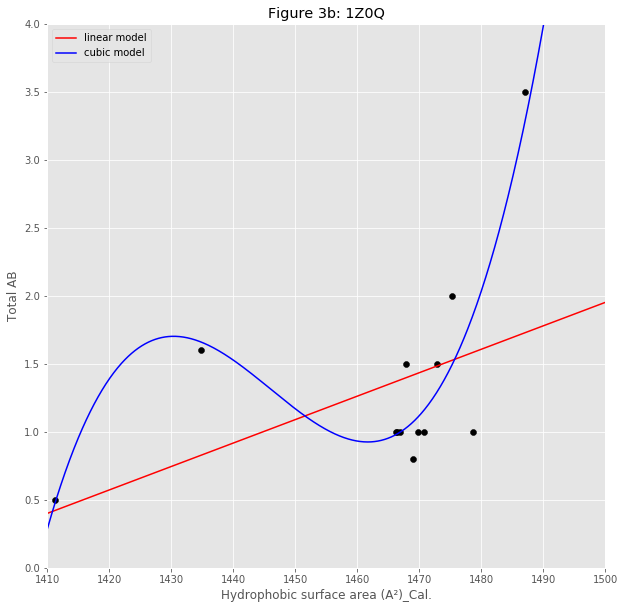

In [263]:
# Figure 3b
x_limits_fig_3b = [1410, 1500]
x_fig_3b = np.linspace(x_limits_fig_3b[0], x_limits_fig_3b[1], 1000)

#Plot data
plt.figure(figsize = (10, 10))
plt.scatter(AllHydrophobicSASFig3b, AllTotalABFig3b, c = 'k')

# Generate Linear Model
guess_params_linear_fig_3b = generate_linear_params(AllHydrophobicSASFig3b, AllTotalABFig3b)
linear_model_fig_3b = generate_linear_model(AllHydrophobicSASFig3b, AllTotalABFig3b, guess_params_linear_fig_3b, residuals_OLS)

# Generate Cubic Model
guess_params_cubic_fig_3b = [1, 1, 1, 1]
cubic_model_fig_3b = generate_linear_model(AllHydrophobicSASFig3b, AllTotalABFig3b, guess_params_cubic_fig_3b, residuals_CLS)

# Plot Models
plt.plot(x_fig_3b, generate_linear_y(x_fig_3b, linear_model_fig_3b), c = 'r', label = 'linear model')
plt.plot(x_fig_3b, generate_cubic_y(x_fig_3b, cubic_model_fig_3b), c = 'b', label = 'cubic model')

#Set axis limits
axis = plt.gca()
axis.set_xlim(x_limits_fig_3b)
axis.set_ylim([0,4])

#Labels
plt.title('Figure 3b: 1Z0Q')
plt.legend()
plt.xlabel('Hydrophobic surface area (A²)_Cal.')
plt.ylabel('Total AB')

plt.show()

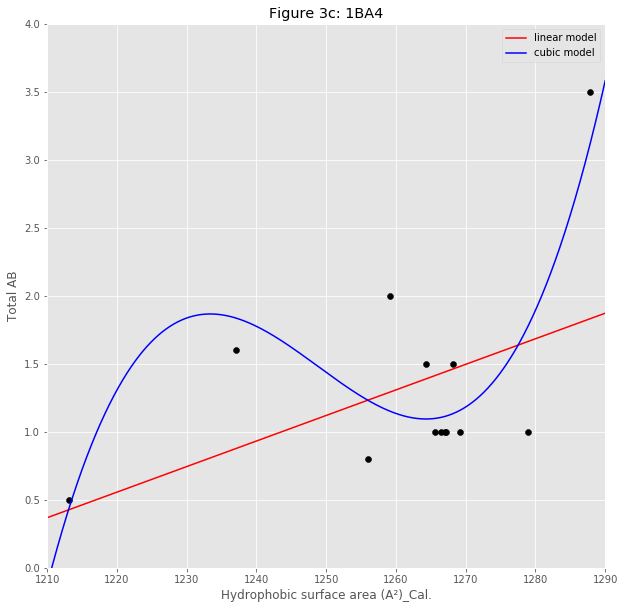

In [264]:
#Figure 3c
x_limits_fig_3c = [1210, 1290]
x_fig_3c = np.linspace(x_limits_fig_3c[0], x_limits_fig_3c[1], 1000)

#Plot data
plt.figure(figsize = (10, 10))
plt.scatter(AllHydrophobicSASFig3c, AllTotalABFig3c, c = 'k')

# Generate Linear Model
guess_params_linear_fig_3c = generate_linear_params(AllHydrophobicSASFig3c, AllTotalABFig3c)
linear_model_fig_3c = generate_linear_model(AllHydrophobicSASFig3c, AllTotalABFig3c, guess_params_linear_fig_3c, residuals_OLS)

# Generate Cubic Model
guess_params_cubic_fig_3c = [1, 1, 1, 1]
cubic_model_fig_3c = generate_linear_model(AllHydrophobicSASFig3c, AllTotalABFig3c, guess_params_cubic_fig_3c, residuals_CLS)

# Plot Models
plt.plot(x_fig_3c, generate_linear_y(x_fig_3c, linear_model_fig_3c), c = 'r', label = 'linear model')
plt.plot(x_fig_3c, generate_cubic_y(x_fig_3c, cubic_model_fig_3c), c = 'b', label = 'cubic model')

#Set axis limits
axis = plt.gca()
axis.set_xlim(x_limits_fig_3c)
axis.set_ylim([0,4])

#Labels
plt.title('Figure 3c: 1BA4')
plt.legend()
plt.xlabel('Hydrophobic surface area (A²)_Cal.')
plt.ylabel('Total AB')

plt.show()

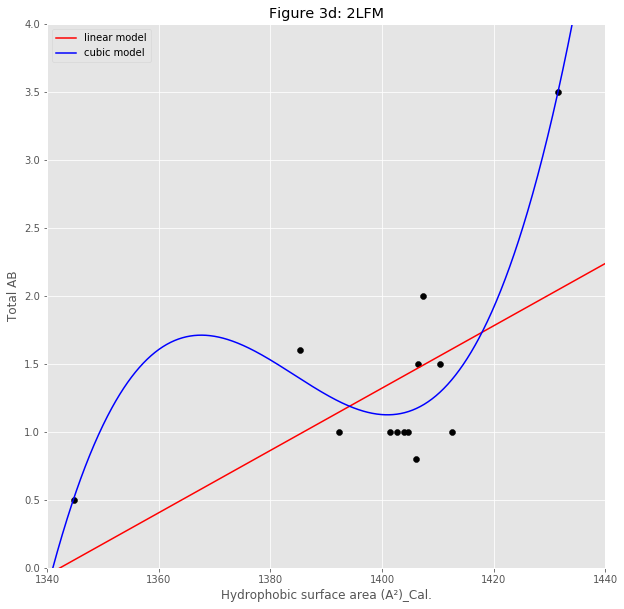

In [265]:
#Figure 3d
x_limits_fig_3d = [1340, 1440]
x_fig_3d = np.linspace(x_limits_fig_3d[0], x_limits_fig_3d[1], 1000)

#Plot data
plt.figure(figsize = (10, 10))
plt.scatter(AllHydrophobicSASFig3d, AllTotalABFig3d, c = 'k')

# Generate Linear Model
guess_params_linear_fig_3d = generate_linear_params(AllHydrophobicSASFig3d, AllTotalABFig3d)
linear_model_fig_3d = generate_linear_model(AllHydrophobicSASFig3d, AllTotalABFig3d, guess_params_linear_fig_3d, residuals_OLS)

# Generate Cubic Model
guess_params_cubic_fig_3d = [1, 1, 1, 1]
cubic_model_fig_3d = generate_linear_model(AllHydrophobicSASFig3d, AllTotalABFig3d, guess_params_cubic_fig_3d, residuals_CLS)

# Plot Models
plt.plot(x_fig_3d, generate_linear_y(x_fig_3d, linear_model_fig_3d), c = 'r', label = 'linear model')
plt.plot(x_fig_3d, generate_cubic_y(x_fig_3d, cubic_model_fig_3d), c = 'b', label = 'cubic model')

#Set axis limits
axis = plt.gca()
axis.set_xlim(x_limits_fig_3d)
axis.set_ylim([0,4])

#Labels
plt.title('Figure 3d: 2LFM')
plt.legend()
plt.xlabel('Hydrophobic surface area (A²)_Cal.')
plt.ylabel('Total AB')

plt.show()

#### Cross validating function for linear models 

In [266]:
from sklearn.model_selection import LeaveOneOut

def cross_validation_linear(x_data, y_data, guess_params):
    loo = LeaveOneOut()

    TrainedLinearModel = []
    NewYLinearModel = []
    PredictionErrors = []
    YTestsArray = []
    LinearYValues = []
    SquaredError = []
    SumSquaredError = []

    #Cross validate
    for train_index, test_index in loo.split(x_data):
            x_train, x_test = (x_data)[train_index], (x_data)[test_index]
            y_train, y_test = (y_data)[train_index], (y_data)[test_index]
        
            #Generate linear model with train data
            TrainedLinearModel = generate_linear_model(x_train, y_train, guess_params_linear_fig_2a, residuals_OLS)
        
            #New y linear model
            NewYLinearModel = generate_linear_y(x_test, TrainedLinearModel)
            LinearYValues.append(NewYLinearModel)
            NewYValues = np.asarray(LinearYValues)
            NewYValues = np.squeeze(NewYValues)
        
            #YTests
            YTestsArray.append(y_test)
            YTestsArrayNew = np.asarray(YTestsArray)
            YTestsArrayNew = np.squeeze(YTestsArrayNew)
        
            #Prediction Errors
            PredictionErrors.append(NewYLinearModel - y_test)
            NewPredictionErrors = np.asarray(PredictionErrors)
            NewPredictionErrors = np.squeeze(NewPredictionErrors)

    #Caluclate sum squared error error
    for i in range(len(YTestsArrayNew)):
        SquaredErrorNumerator = (YTestsArrayNew[i] - NewYValues[i])**2
        SquaredErrorDenominator = (YTestsArrayNew[i])**2
        TotalSquaredError = SquaredErrorNumerator/SquaredErrorDenominator
        SquaredError.append(TotalSquaredError)

    SumSquaredError.append(sum(SquaredError))
    print(SumSquaredError)
    
    return [YTestsArrayNew, NewYValues, SumSquaredError]

#### Cross validating function for cubic models

In [267]:
def cross_validation_cubic(x_data, y_data, guess_params):
    loo = LeaveOneOut()

    TrainedCubicModel = []
    NewYCubicModel = []
    CubicPredictionErrors = []
    YTestsArray = []
    CubicYValues = []
    SquaredError = []
    SumSquaredError = []

    #Cross validate
    for train_index, test_index in loo.split(x_data):
            x_train, x_test = (x_data)[train_index], (x_data)[test_index]
            y_train, y_test = (y_data)[train_index], (y_data)[test_index]
        
            #Generate cubic model with train data
            TrainedCubicModel = generate_cubic_model(x_train, y_train, guess_params, residuals_CLS)
        
            #New y cubic model
            NewYCubicModel = generate_cubic_y(x_test, TrainedCubicModel)
            CubicYValues.append(NewYCubicModel)
            NewYValues = np.asarray(CubicYValues)
            NewYValues = np.squeeze(NewYValues)
        
            #YTests
            YTestsArray.append(y_test)
            YTestsArrayNew = np.asarray(YTestsArray)
            YTestsArrayNew = np.squeeze(YTestsArrayNew)
        
            #Prediction Errors
            PredictionErrors.append(NewYCubicModel - y_test)
            NewPredictionErrors = np.asarray(PredictionErrors)
            NewPredictionErrors = np.squeeze(NewPredictionErrors)

    #Caluclate sum squared error error
    for i in range(len(YTestsArrayNew)):
        SquaredErrorNumerator = (YTestsArrayNew[i] - NewYValues[i])**2
        SquaredErrorDenominator = (YTestsArrayNew[i])**2
        TotalSquaredError = SquaredErrorNumerator/SquaredErrorDenominator
        SquaredError.append(TotalSquaredError)

    SumSquaredError.append(sum(SquaredError))
    
    print(SumSquaredError)
    
    return [YTestsArrayNew, NewYValues, SumSquaredError]

#### Plot function

In [268]:
# Define function for ploting cross validation
def plot_cv(meas_PC, pred_PC, title_PC, x_limits):
    #Plot measured vs. predicted
    plt.figure(figsize=(10, 10))
    plt.scatter(meas_PC, pred_PC, c = 'k', label='(Measured, Predicted)')
    plt.plot(x_limits, x_limits, c = 'r', label = 'y = x')
    plt.xlabel('Measured Data')
    plt.ylabel('Predicted Data')
    plt.title(title_PC)
    plt.legend()

    axis = plt.gca()
    axis.set_xlim(x_limits)

    plt.show()

#### Cross validating figure 2a with linear model

[0.8716107327489732]


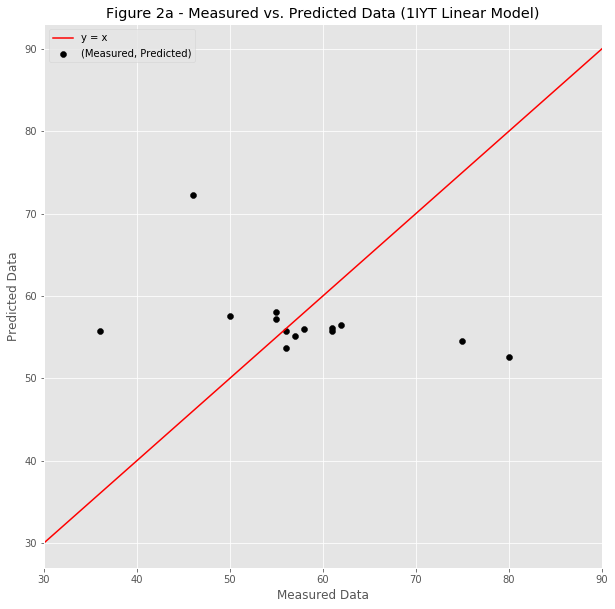

In [269]:
cv_fig_2a_linear_title = 'Figure 2a - Measured vs. Predicted Data (1IYT Linear Model)'
cv_fig_2a_linear = cross_validation_linear(AllHydrophobicSASFig2a, AllTOnsetFig2a, guess_params_linear_fig_2a)
cv_fig_2a_linear_x_limits = [30, 90]

plot_cv(cv_fig_2a_linear[0], cv_fig_2a_linear[1], cv_fig_2a_linear_title, cv_fig_2a_linear_x_limits)

#### Cross validating figure 2a with cubic model

[11.692507401340752]


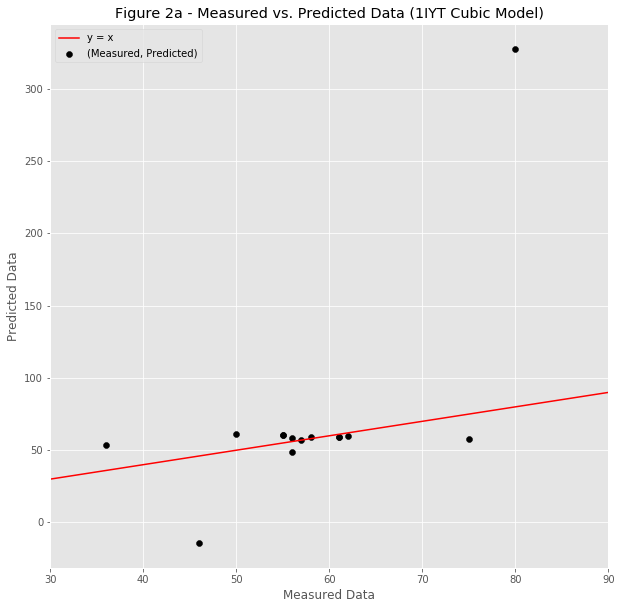

In [270]:
cv_fig_2a_cubic_title = 'Figure 2a - Measured vs. Predicted Data (1IYT Cubic Model)'
cv_fig_2a_cubic = cross_validation_cubic(AllHydrophobicSASFig2a, AllTOnsetFig2a, guess_params_cubic_fig_2a)
cv_fig_2a_cubic_x_limits = [30, 90]

plot_cv(cv_fig_2a_cubic[0], cv_fig_2a_cubic[1], cv_fig_2a_cubic_title, cv_fig_2a_cubic_x_limits)

#### Cross validating figure 2b with linear model

[0.8481182980582794]


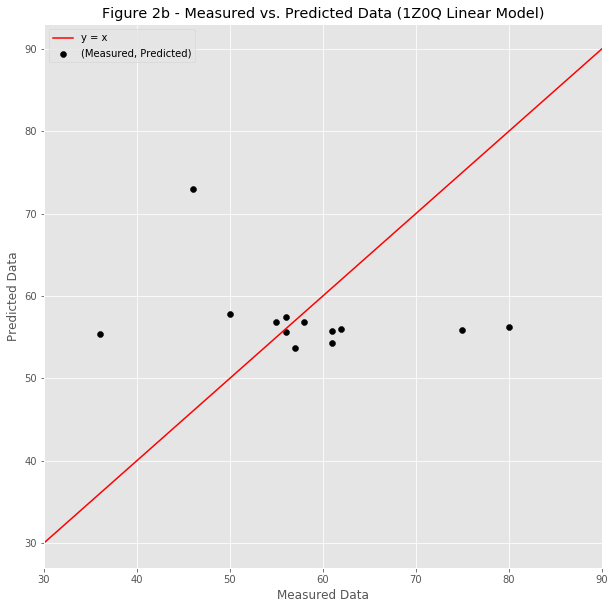

In [271]:
cv_fig_2b_linear_title = 'Figure 2b - Measured vs. Predicted Data (1Z0Q Linear Model)'
cv_fig_2b_linear = cross_validation_linear(AllHydrophobicSASFig2b, AllTOnsetFig2b, guess_params_linear_fig_2b)
cv_fig_2b_linear_x_limits = [30, 90]

plot_cv(cv_fig_2b_linear[0], cv_fig_2b_linear[1], cv_fig_2b_linear_title, cv_fig_2b_linear_x_limits)

#### Cross validating figure 2b with cubic model

[0.8712918359112408]


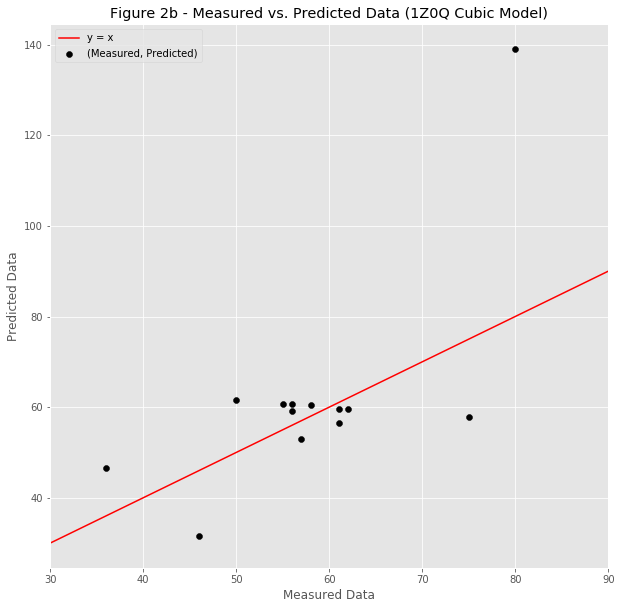

In [272]:
cv_fig_2b_cubic_title = 'Figure 2b - Measured vs. Predicted Data (1Z0Q Cubic Model)'
cv_fig_2b_cubic = cross_validation_cubic(AllHydrophobicSASFig2b, AllTOnsetFig2b, guess_params_cubic_fig_2b)
cv_fig_2b_cubic_x_limits = [30, 90]

plot_cv(cv_fig_2b_cubic[0], cv_fig_2b_cubic[1], cv_fig_2b_cubic_title, cv_fig_2b_cubic_x_limits)

#### Cross validating figure 2c with linear model

[0.7545314209513886]


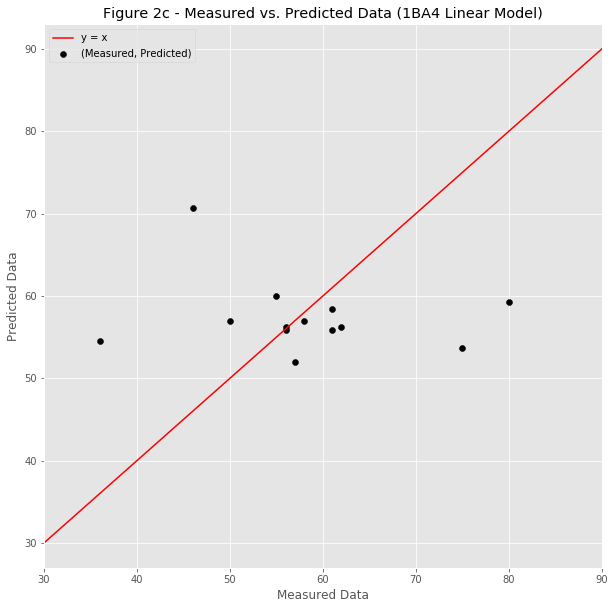

In [273]:
cv_fig_2c_linear_title = 'Figure 2c - Measured vs. Predicted Data (1BA4 Linear Model)'
cv_fig_2c_linear = cross_validation_linear(AllHydrophobicSASFig2c, AllTOnsetFig2c, guess_params_linear_fig_2c)
cv_fig_2c_linear_x_limits = [30, 90]

plot_cv(cv_fig_2c_linear[0], cv_fig_2c_linear[1], cv_fig_2c_linear_title, cv_fig_2c_linear_x_limits)

#### Cross validating figure 2c with cubic model

[0.2862356555884068]


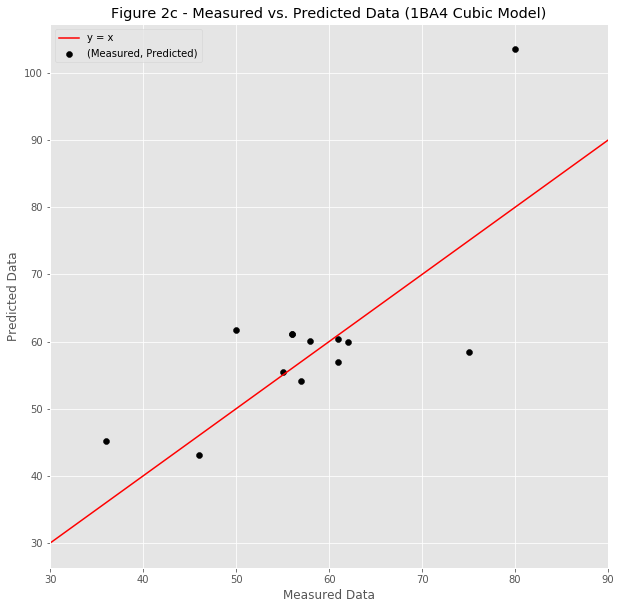

In [274]:
cv_fig_2c_cubic_title = 'Figure 2c - Measured vs. Predicted Data (1BA4 Cubic Model)'
cv_fig_2c_cubic = cross_validation_cubic(AllHydrophobicSASFig2c, AllTOnsetFig2c, guess_params_cubic_fig_2c)
cv_fig_2c_cubic_x_limits = [30, 90]

plot_cv(cv_fig_2c_cubic[0], cv_fig_2c_cubic[1], cv_fig_2c_cubic_title, cv_fig_2c_cubic_x_limits)

#### Cross validating figure 2d with linear model

[0.43146721945789757]


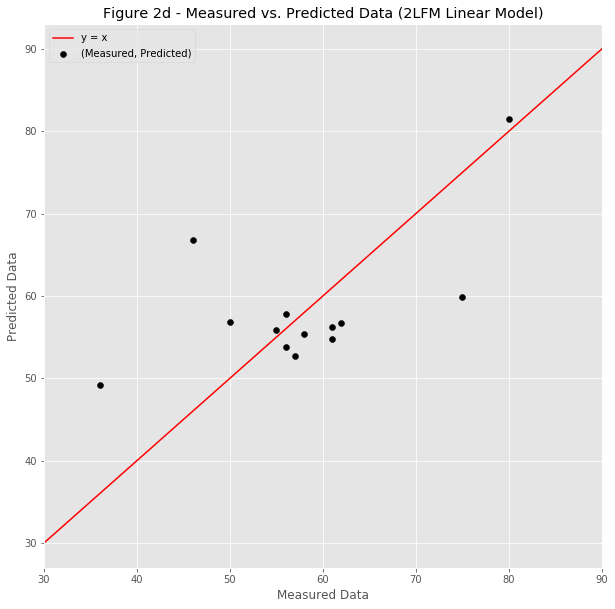

In [275]:
cv_fig_2d_linear_title = 'Figure 2d - Measured vs. Predicted Data (2LFM Linear Model)'
cv_fig_2d_linear = cross_validation_linear(AllHydrophobicSASFig2d, AllTOnsetFig2d, guess_params_linear_fig_2d)
cv_fig_2d_linear_x_limits = [30, 90]

plot_cv(cv_fig_2d_linear[0], cv_fig_2d_linear[1], cv_fig_2d_linear_title, cv_fig_2d_linear_x_limits)

#### Cross validating figure 2d with cubic model

[34.37219582541364]


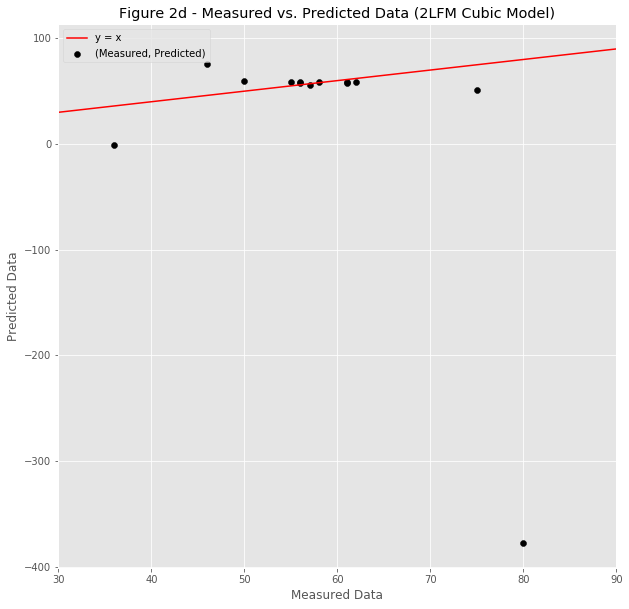

In [276]:
cv_fig_2d_cubic_title = 'Figure 2d - Measured vs. Predicted Data (2LFM Cubic Model)'
cv_fig_2d_cubic = cross_validation_cubic(AllHydrophobicSASFig2d, AllTOnsetFig2d, guess_params_cubic_fig_2d)
cv_fig_2d_cubic_x_limits = [30, 90]

plot_cv(cv_fig_2d_cubic[0], cv_fig_2d_cubic[1], cv_fig_2d_cubic_title, cv_fig_2d_cubic_x_limits)

#### Cross validating figure 3a with linear model

[2.81777887107486]


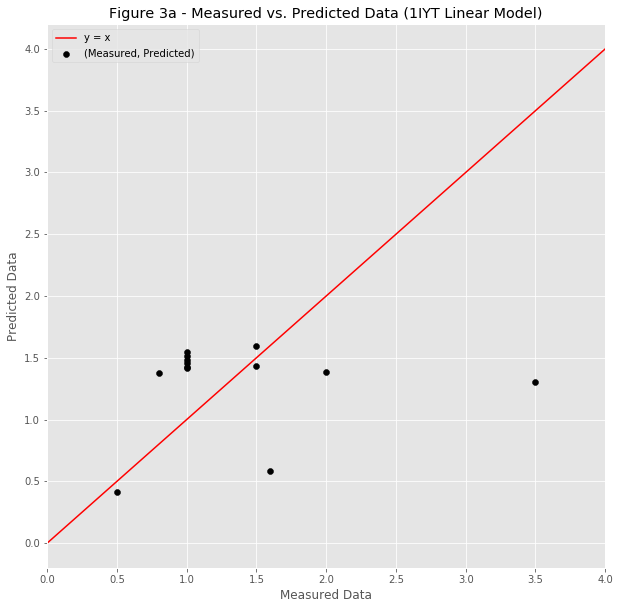

In [277]:
cv_fig_3a_linear_title = 'Figure 3a - Measured vs. Predicted Data (1IYT Linear Model)'
cv_fig_3a_linear = cross_validation_linear(AllHydrophobicSASFig3a, AllTotalABFig3a, guess_params_linear_fig_3a)
cv_fig_3a_linear_x_limits = [0,4]

plot_cv(cv_fig_3a_linear[0], cv_fig_3a_linear[1], cv_fig_3a_linear_title, cv_fig_3a_linear_x_limits)

#### Cross validating figure 3a with cubic model

[376.2645780884349]


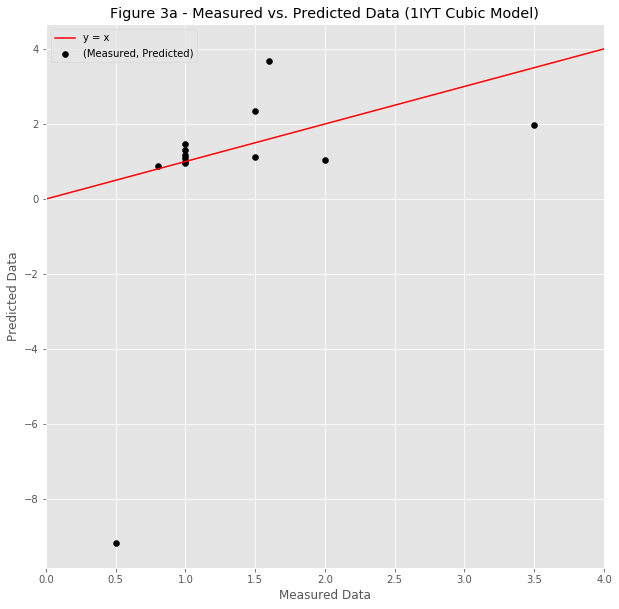

In [278]:
cv_fig_3a_cubic_title = 'Figure 3a - Measured vs. Predicted Data (1IYT Cubic Model)'
cv_fig_3a_cubic = cross_validation_cubic(AllHydrophobicSASFig3a, AllTotalABFig3a, guess_params_cubic_fig_3a)
cv_fig_3a_cubic_x_limits = [0,4]

plot_cv(cv_fig_3a_cubic[0], cv_fig_3a_cubic[1], cv_fig_3a_cubic_title, cv_fig_3a_cubic_x_limits)

#### Cross validating figure 3b with linear model

[3.219942811768295]


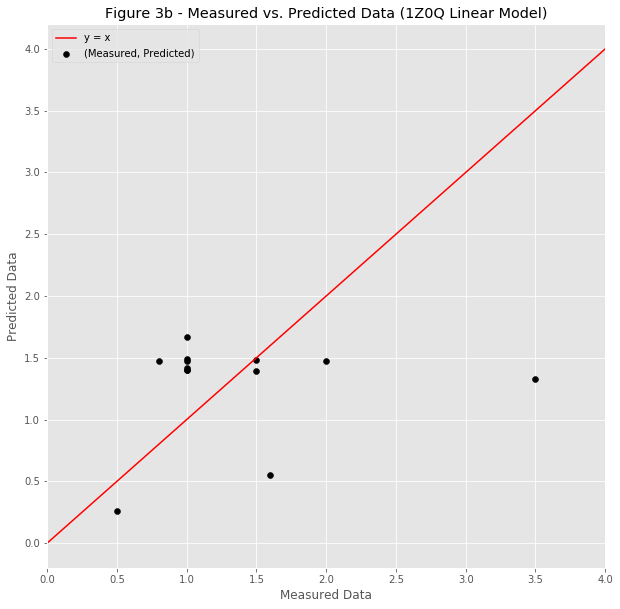

In [279]:
cv_fig_3b_linear_title = 'Figure 3b - Measured vs. Predicted Data (1Z0Q Linear Model)'
cv_fig_3b_linear = cross_validation_linear(AllHydrophobicSASFig3b, AllTotalABFig3b, guess_params_linear_fig_3b)
cv_fig_3b_linear_x_limits = [0,4]

plot_cv(cv_fig_3b_linear[0], cv_fig_3b_linear[1], cv_fig_3b_linear_title, cv_fig_3b_linear_x_limits)

#### Cross validating figure 3b with cubic model

[161.6476855323597]


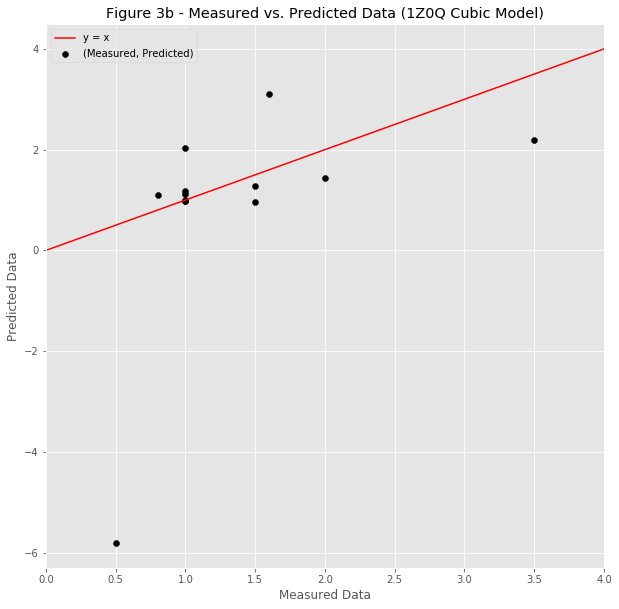

In [280]:
cv_fig_3b_cubic_title = 'Figure 3b - Measured vs. Predicted Data (1Z0Q Cubic Model)'
cv_fig_3b_cubic = cross_validation_cubic(AllHydrophobicSASFig3b, AllTotalABFig3b, guess_params_cubic_fig_3b)
cv_fig_3b_cubic_x_limits = [0,4]

plot_cv(cv_fig_3b_cubic[0], cv_fig_3b_cubic[1], cv_fig_3b_cubic_title, cv_fig_3b_cubic_x_limits)

#### Cross validating figure 3c with linear model

[3.174008784421016]


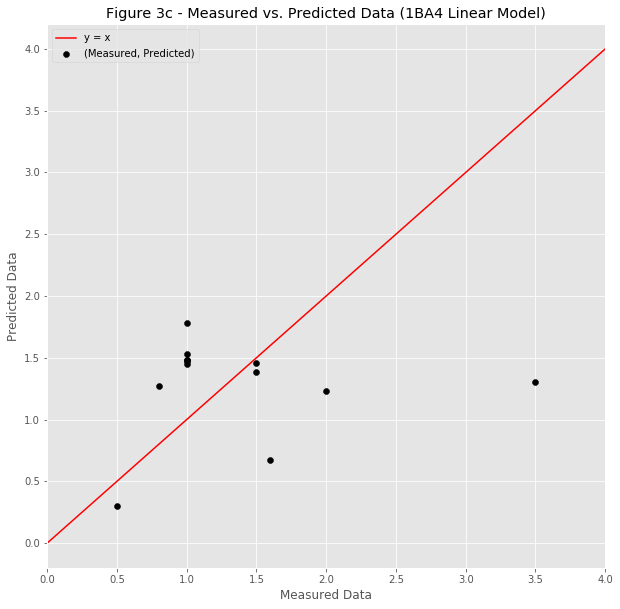

In [281]:
cv_fig_3c_linear_title = 'Figure 3c - Measured vs. Predicted Data (1BA4 Linear Model)'
cv_fig_3c_linear = cross_validation_linear(AllHydrophobicSASFig3c, AllTotalABFig3c, guess_params_linear_fig_3c)
cv_fig_3c_linear_x_limits = [0,4]

plot_cv(cv_fig_3c_linear[0], cv_fig_3c_linear[1], cv_fig_3c_linear_title, cv_fig_3c_linear_x_limits)

#### Cross validating figure 3c with cubic model

[259.3108876409212]


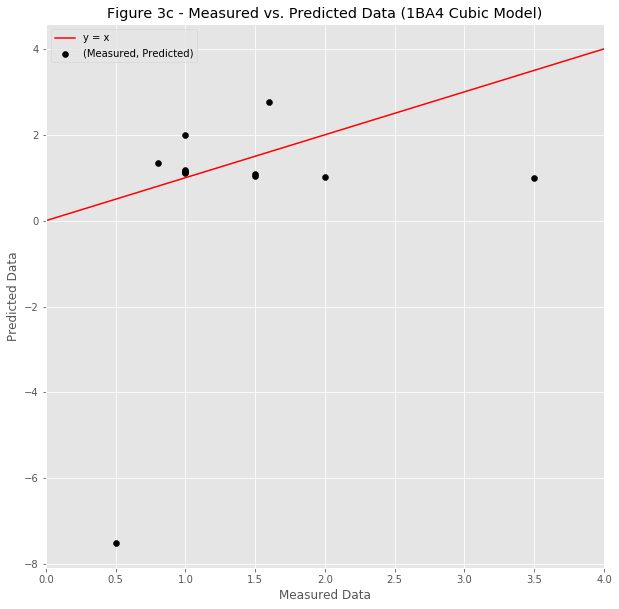

In [282]:
cv_fig_3c_cubic_title = 'Figure 3c - Measured vs. Predicted Data (1BA4 Cubic Model)'
cv_fig_3c_cubic = cross_validation_cubic(AllHydrophobicSASFig3c, AllTotalABFig3c, guess_params_cubic_fig_3c)
cv_fig_3c_cubic_x_limits = [0,4]

plot_cv(cv_fig_3c_cubic[0], cv_fig_3c_cubic[1], cv_fig_3c_cubic_title, cv_fig_3c_cubic_x_limits)

#### Cross validating figure 3d with linear model

[13.892568042690778]


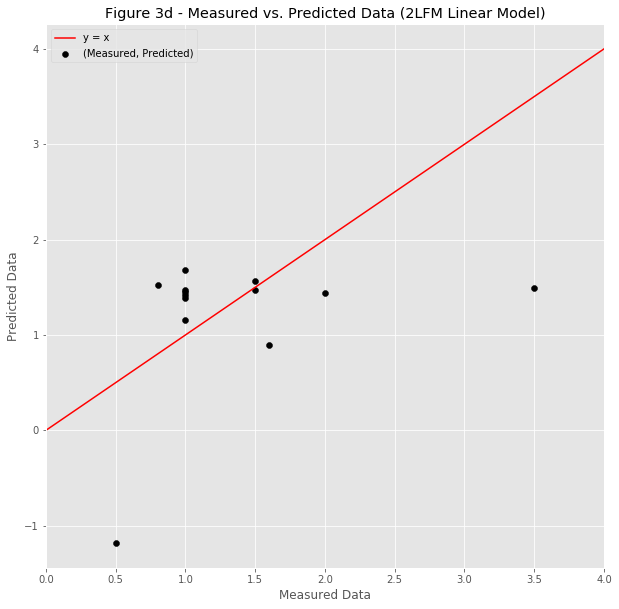

In [283]:
cv_fig_3d_linear_title = 'Figure 3d - Measured vs. Predicted Data (2LFM Linear Model)'
cv_fig_3d_linear = cross_validation_linear(AllHydrophobicSASFig3d, AllTotalABFig3d, guess_params_linear_fig_3d)
cv_fig_3d_linear_x_limits = [0,4]

plot_cv(cv_fig_3d_linear[0], cv_fig_3d_linear[1], cv_fig_3d_linear_title, cv_fig_3d_linear_x_limits)

#### Cross validating figure 3d with cubic model

[479.2994703533995]


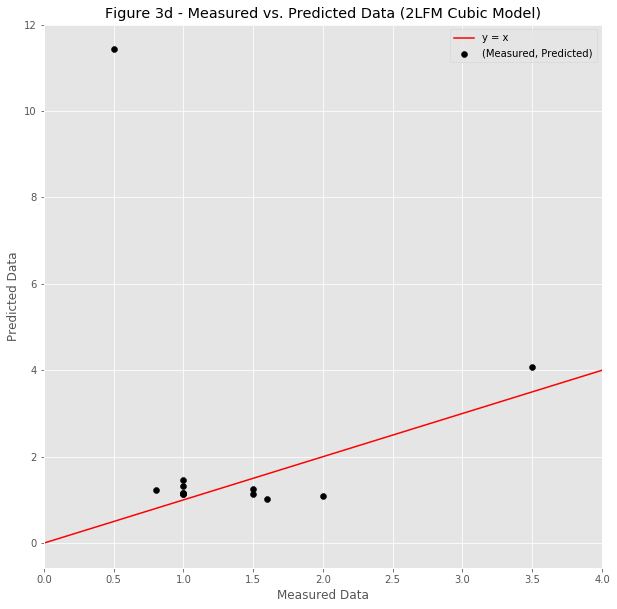

In [284]:
cv_fig_3d_cubic_title = 'Figure 3d - Measured vs. Predicted Data (2LFM Cubic Model)'
cv_fig_3d_cubic = cross_validation_cubic(AllHydrophobicSASFig3d, AllTotalABFig3d, guess_params_cubic_fig_3d)
cv_fig_3d_cubic_x_limits = [0,4]

plot_cv(cv_fig_3d_cubic[0], cv_fig_3d_cubic[1], cv_fig_3d_cubic_title, cv_fig_3d_cubic_x_limits)

#### Fig. S5 Plots

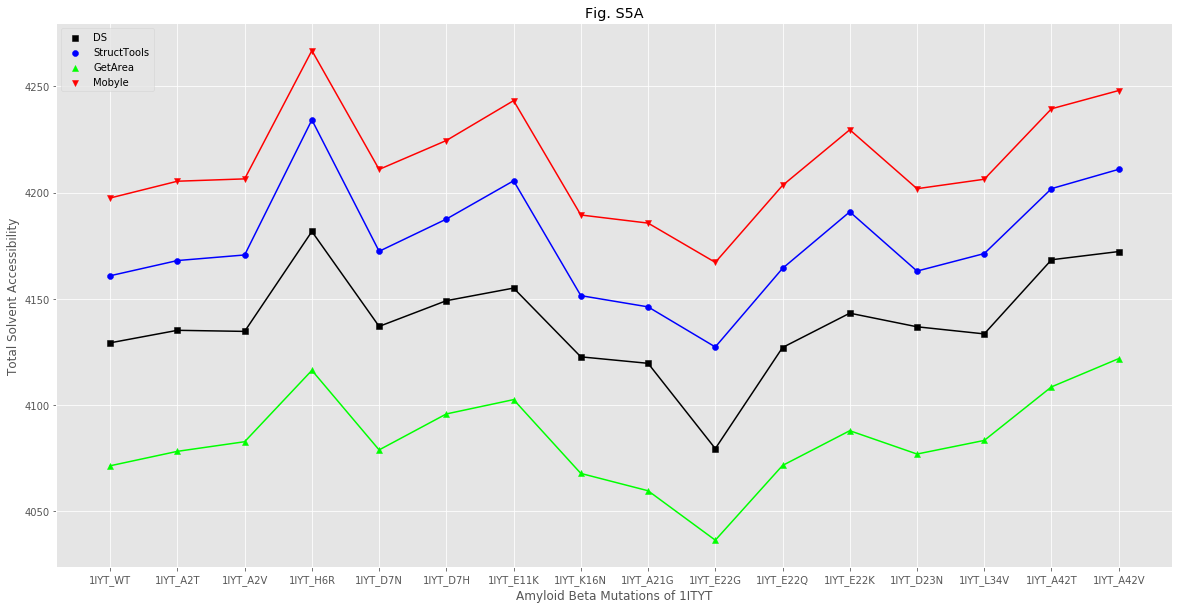

In [285]:
# Recreate Fig S5A
# Store Web based tools output
DS_1IYT = _1IYT_tot_solv_acc[:, 0]
ST_1ITYT = _1IYT_tot_solv_acc[:, 1]
GA_1IYT = _1IYT_tot_solv_acc[:, 2]
M_1ITYT = _1IYT_tot_solv_acc[:, 3]

# Plot data with smoothed curve
plt.figure(figsize = (20, 10))

plt.scatter(_1IYT_conform, DS_1IYT, label = web_based_tools[0], c = 'k', marker = 's')
plt.plot(_1IYT_conform, DS_1IYT, c = 'k')

plt.scatter(_1IYT_conform, ST_1ITYT, label = web_based_tools[1], c = 'b', marker = 'o')
plt.plot(_1IYT_conform, ST_1ITYT, c = 'b')

plt.scatter(_1IYT_conform, GA_1IYT, label = web_based_tools[2], c = 'lime', marker = '^')
plt.plot(_1IYT_conform, GA_1IYT, c = 'lime')

plt.scatter(_1IYT_conform, M_1ITYT, label = web_based_tools[3], c = 'r', marker = 'v')
plt.plot(_1IYT_conform, M_1ITYT, c = 'r')

plt.xlabel('Amyloid Beta Mutations of 1ITYT')
plt.ylabel('Total Solvent Accessibility')
plt.title("Fig. S5A")
plt.legend()
plt.show()

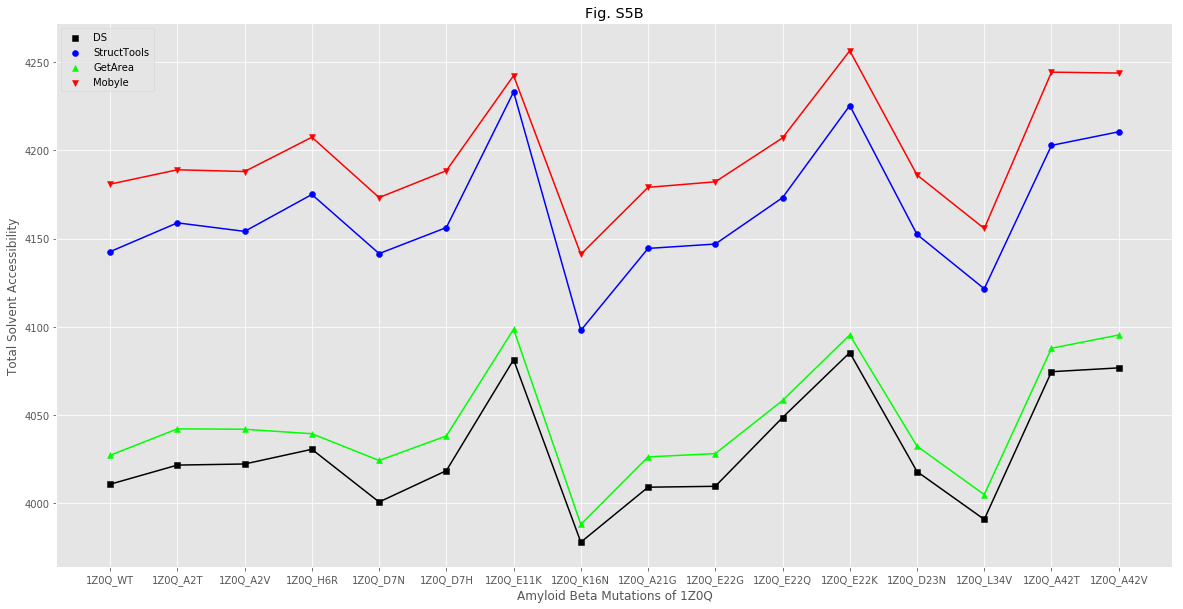

In [286]:
# Recreate Fig S5B
# Store Web based tools output
DS_1Z0Q = _1Z0Q_tot_solv_acc[:, 0]
ST_1Z0Q = _1Z0Q_tot_solv_acc[:, 1]
GA_1Z0Q = _1Z0Q_tot_solv_acc[:, 2]
M_1Z0Q = _1Z0Q_tot_solv_acc[:, 3]

# Plot data with smoothed curve
plt.figure(figsize = (20, 10))

plt.scatter(_1Z0Q_conform, DS_1Z0Q, label = web_based_tools[0], c = 'k', marker = 's')
plt.plot(_1Z0Q_conform, DS_1Z0Q, c = 'k')

plt.scatter(_1Z0Q_conform, ST_1Z0Q, label = web_based_tools[1], c = 'b', marker = 'o')
plt.plot(_1Z0Q_conform, ST_1Z0Q, c = 'b')

plt.scatter(_1Z0Q_conform, GA_1Z0Q, label = web_based_tools[2], c = 'lime', marker = '^')
plt.plot(_1Z0Q_conform, GA_1Z0Q, c = 'lime')

plt.scatter(_1Z0Q_conform, M_1Z0Q, label = web_based_tools[3], c = 'r', marker = 'v')
plt.plot(_1Z0Q_conform, M_1Z0Q, c = 'r')

plt.xlabel('Amyloid Beta Mutations of 1Z0Q')
plt.ylabel('Total Solvent Accessibility')
plt.title("Fig. S5B")
plt.legend()
plt.show()

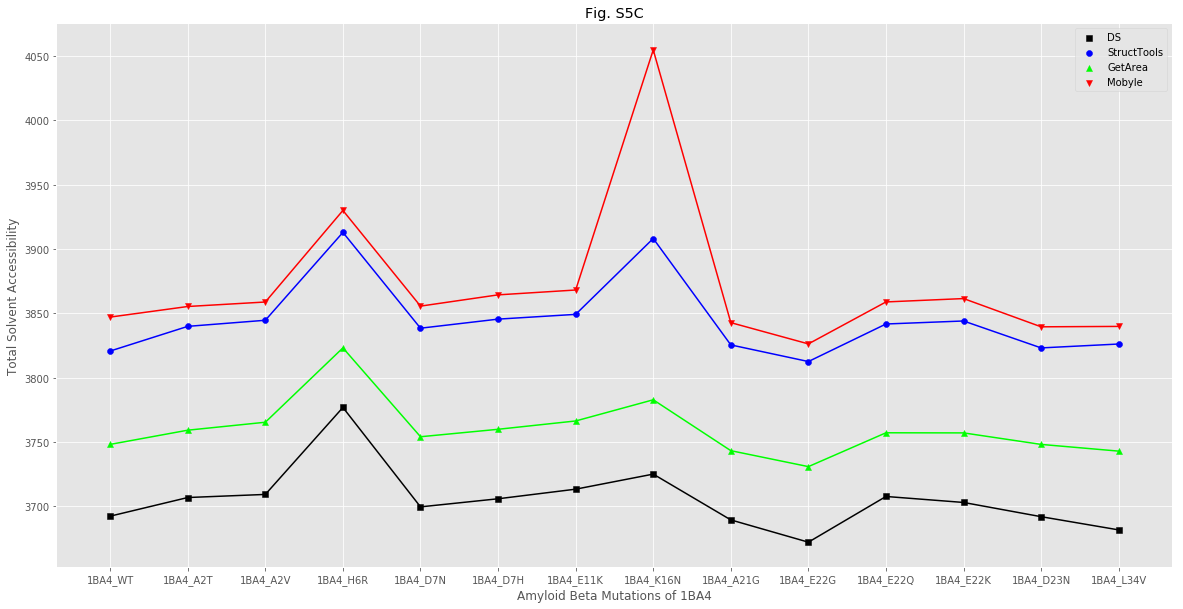

In [287]:
# Recreate Fig S5C
# Store Web based tools output
DS_1BA4 = _1BA4_tot_solv_acc[:, 0]
ST_1BA4 = _1BA4_tot_solv_acc[:, 1]
GA_1BA4 = _1BA4_tot_solv_acc[:, 2]
M_1BA4 = _1BA4_tot_solv_acc[:, 3]

# Plot data with smoothed curve
plt.figure(figsize = (20, 10))

plt.scatter(_1BA4_conform, DS_1BA4, label = web_based_tools[0], c = 'k', marker = 's')
plt.plot(_1BA4_conform, DS_1BA4, c = 'k')

plt.scatter(_1BA4_conform, ST_1BA4, label = web_based_tools[1], c = 'b', marker = 'o')
plt.plot(_1BA4_conform, ST_1BA4, c = 'b')

plt.scatter(_1BA4_conform, GA_1BA4, label = web_based_tools[2], c = 'lime', marker = '^')
plt.plot(_1BA4_conform, GA_1BA4, c = 'lime')

plt.scatter(_1BA4_conform, M_1BA4, label = web_based_tools[3], c = 'r', marker = 'v')
plt.plot(_1BA4_conform, M_1BA4, c = 'r')

plt.xlabel('Amyloid Beta Mutations of 1BA4')
plt.ylabel('Total Solvent Accessibility')
plt.title("Fig. S5C")
plt.legend()
plt.show()

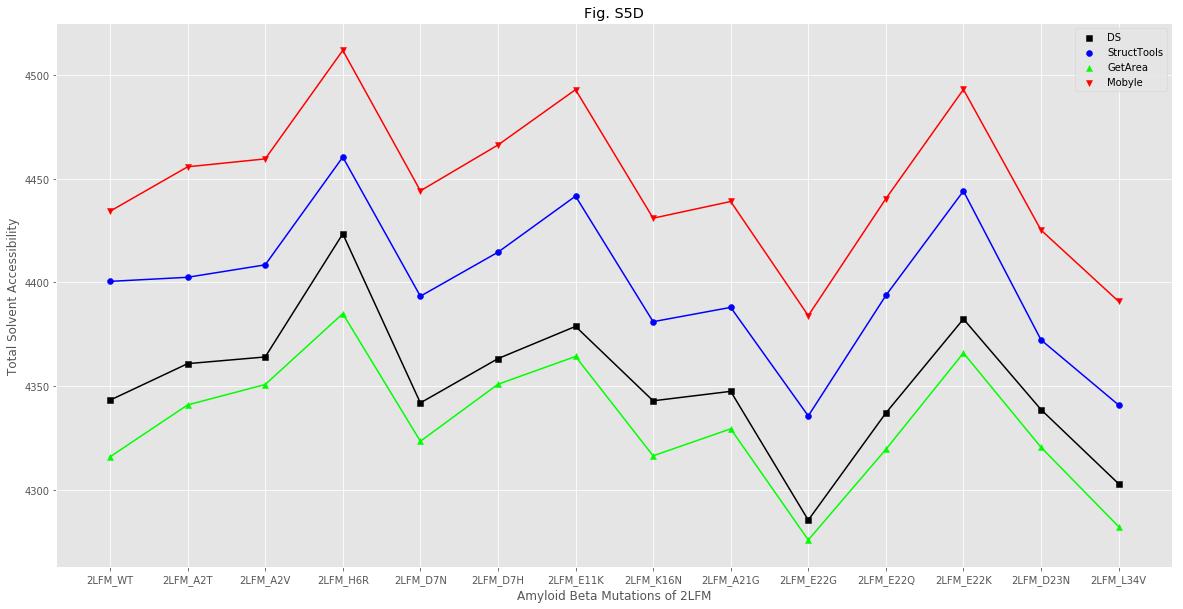

In [288]:
# Recreate Fig S5D
# Store Web based tools output
DS_2LFM = _2LFM_tot_solv_acc[:, 0]
ST_2LFM = _2LFM_tot_solv_acc[:, 1]
GA_2LFM = _2LFM_tot_solv_acc[:, 2]
M_2LFM = _2LFM_tot_solv_acc[:, 3]

# Plot data with smoothed curve
plt.figure(figsize = (20, 10))

plt.scatter(_2LFM_conform, DS_2LFM, label = web_based_tools[0], c = 'k', marker = 's')
plt.plot(_2LFM_conform, DS_2LFM, c = 'k')

plt.scatter(_2LFM_conform, ST_2LFM, label = web_based_tools[1], c = 'b', marker = 'o')
plt.plot(_2LFM_conform, ST_2LFM, c = 'b')

plt.scatter(_2LFM_conform, GA_2LFM, label = web_based_tools[2], c = 'lime', marker = '^')
plt.plot(_2LFM_conform, GA_2LFM, c = 'lime')

plt.scatter(_2LFM_conform, M_2LFM, label = web_based_tools[3], c = 'r', marker = 'v')
plt.plot(_2LFM_conform, M_2LFM, c = 'r')

plt.xlabel('Amyloid Beta Mutations of 2LFM')
plt.ylabel('Total Solvent Accessibility')
plt.title("Fig. S5D")
plt.legend()
plt.show()

#### Reproduce the plots seen in Fig. S7

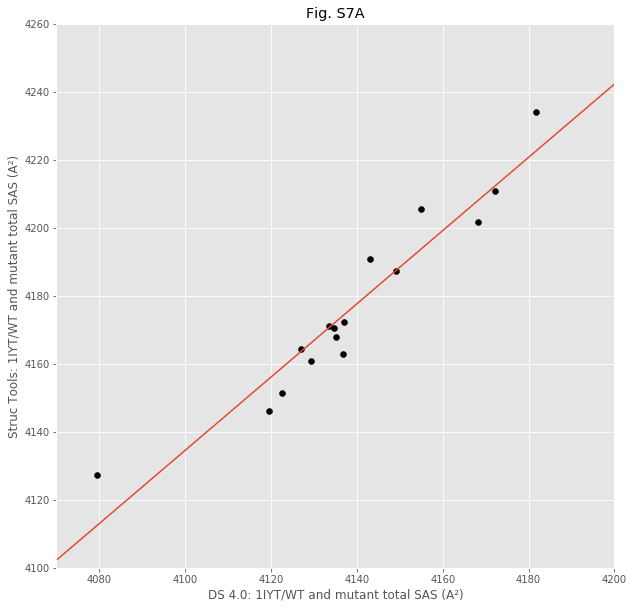

In [289]:
#Figure S7A

#Plot figure and points
plt.figure(figsize = (10, 10))
plt.scatter(DS_1IYT, ST_1ITYT, c = 'k')
x_limits_fig_s7a = np.array([4070, 4200])

# Generate Model
guess_params_fig_7a = generate_linear_params(DS_1IYT, ST_1ITYT)
model_fig_7a = generate_linear_model(DS_1IYT, ST_1ITYT, guess_params_fig_7a, residuals_OLS)

# Plot Model
plt.plot(x_limits_fig_s7a, generate_linear_y(x_limits_fig_s7a, model_fig_7a))

#Set axis limits
axis = plt.gca()
axis.set_xlim(x_limits_fig_s7a)
axis.set_ylim([4100,4260])

#Labels
plt.xlabel('DS 4.0: 1IYT/WT and mutant total SAS (A²)')
plt.ylabel('Struc Tools: 1IYT/WT and mutant total SAS (A²)')
plt.title('Fig. S7A')

plt.show()

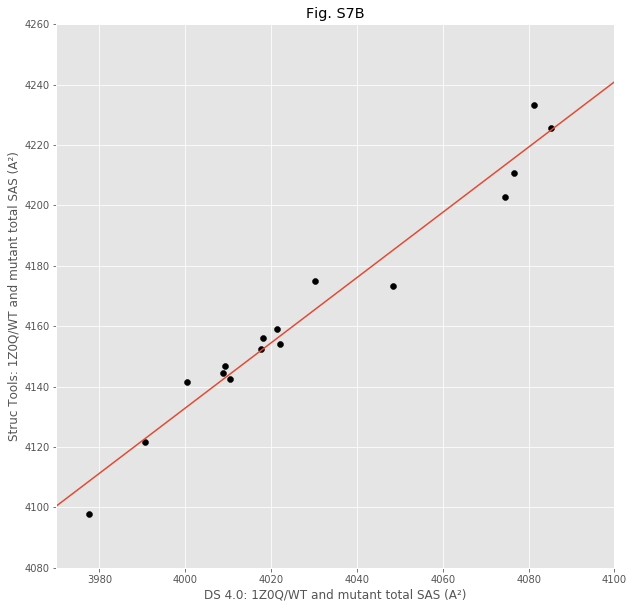

In [290]:
#Figure S7B

#Plot figure and points
plt.figure(figsize = (10, 10))
plt.scatter(DS_1Z0Q, ST_1Z0Q, c = 'k')
x_limits_fig_s7b = np.array([3970,4100])

# Generate Model
guess_params_fig_7b = generate_linear_params(DS_1Z0Q, ST_1Z0Q)
model_fig_7b = generate_linear_model(DS_1Z0Q, ST_1Z0Q, guess_params_fig_7b, residuals_OLS)

# Plot Model
plt.plot(x_limits_fig_s7b, generate_linear_y(x_limits_fig_s7b, model_fig_7b))

#Set axis limits
axis = plt.gca()
axis.set_xlim(x_limits_fig_s7b)
axis.set_ylim([4080,4260])

#Labels
plt.xlabel('DS 4.0: 1Z0Q/WT and mutant total SAS (A²)')
plt.ylabel('Struc Tools: 1Z0Q/WT and mutant total SAS (A²)')
plt.title('Fig. S7B')

plt.show()

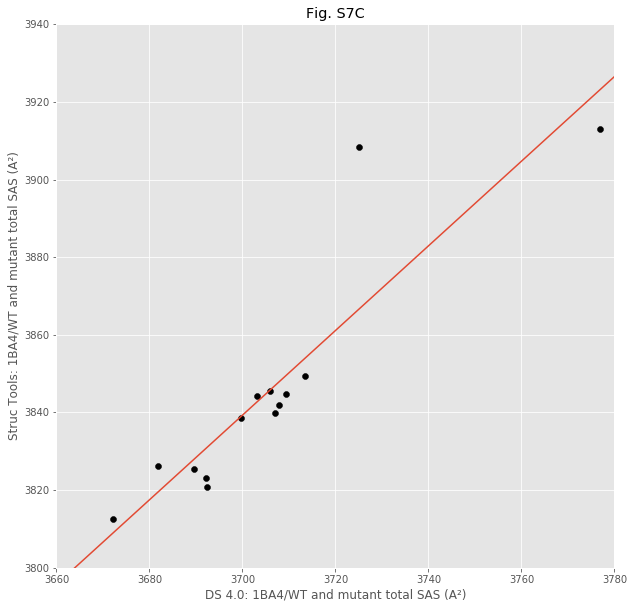

In [291]:
#Figure S7C

#Plot figure and points
plt.figure(figsize = (10, 10))
plt.scatter(DS_1BA4, ST_1BA4, c = 'k')
x_limits_fig_s7c = np.array([3660,3780])

# Generate Model
guess_params_fig_7c = generate_linear_params(DS_1BA4, ST_1BA4)
model_fig_7c = generate_linear_model(DS_1BA4, ST_1BA4, guess_params_fig_7c, residuals_OLS)

# Plot Model
plt.plot(x_limits_fig_s7c, generate_linear_y(x_limits_fig_s7c, model_fig_7c))

#Set axis limits
axis = plt.gca()
axis.set_xlim(x_limits_fig_s7c)
axis.set_ylim([3800,3940])

#Labels
plt.xlabel('DS 4.0: 1BA4/WT and mutant total SAS (A²)')
plt.ylabel('Struc Tools: 1BA4/WT and mutant total SAS (A²)')
plt.title('Fig. S7C')

plt.show()

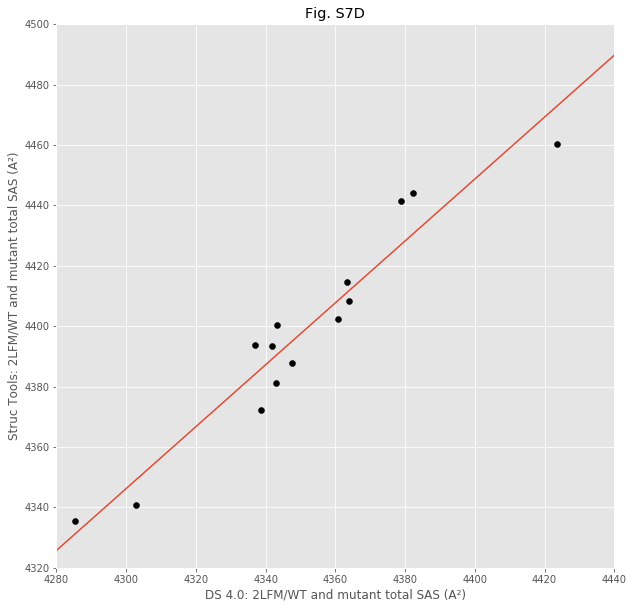

In [292]:
#Figure S7D

#Plot figure and points
plt.figure(figsize = (10, 10))
plt.scatter(DS_2LFM, ST_2LFM, c = 'k')
x_limits_fig_s7d = np.array([4280,4440])

# Generate Model
guess_params_fig_7d = generate_linear_params(DS_2LFM, ST_2LFM)
model_fig_7d = generate_linear_model(DS_2LFM, ST_2LFM, guess_params_fig_7d, residuals_OLS)

# Plot Model
plt.plot(x_limits_fig_s7d, generate_linear_y(x_limits_fig_s7d, model_fig_7d))

#Set axis limits
axis = plt.gca()
axis.set_xlim(x_limits_fig_s7d)
axis.set_ylim([4320,4500])

#Labels
plt.xlabel('DS 4.0: 2LFM/WT and mutant total SAS (A²)')
plt.ylabel('Struc Tools: 2LFM/WT and mutant total SAS (A²)')
plt.title('Fig. S7D')

plt.show()

#### Upload hydrophobic and hydrophilic SAS areas and reproduce the plots in Fig. S8

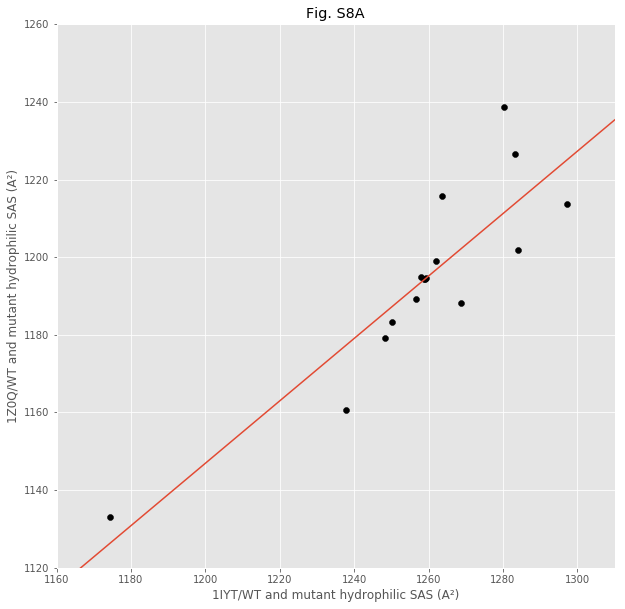

In [293]:
#Figure S8A
_1IYT_hydrophilic_SAS = _1IYT_hydro_SAS[:, 1]
_1Z0Q_hydrophilic_SAS = _1Z0Q_hydro_SAS[:, 1]

# Plot data
plt.figure(figsize = (10, 10))
plt.scatter(_1IYT_hydrophilic_SAS, _1Z0Q_hydrophilic_SAS, c = 'k')
x_limits_fig_s8a = np.array([1160,1310])

# Generate Model
guess_params_fig_8a = generate_linear_params(_1IYT_hydrophilic_SAS, _1Z0Q_hydrophilic_SAS)
model_fig_8a = generate_linear_model(_1IYT_hydrophilic_SAS, _1Z0Q_hydrophilic_SAS, guess_params_fig_8a, residuals_OLS)

# Plot Model
plt.plot(x_limits_fig_s8a, generate_linear_y(x_limits_fig_s8a, model_fig_8a))

#Set axis limits
axis = plt.gca()
axis.set_xlim(x_limits_fig_s8a)
axis.set_ylim([1120,1260])

#Labels
plt.xlabel('1IYT/WT and mutant hydrophilic SAS (A²)')
plt.ylabel('1Z0Q/WT and mutant hydrophilic SAS (A²)')
plt.title('Fig. S8A')

plt.show()

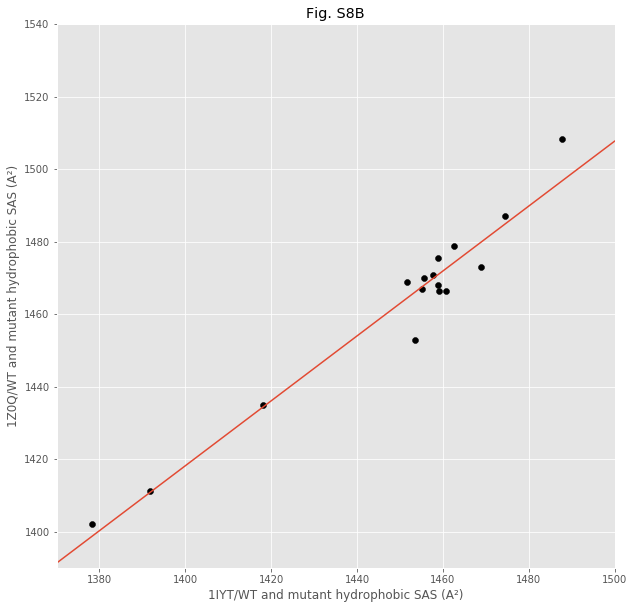

In [294]:
#Figure S8B

# Plot data
plt.figure(figsize = (10, 10))
plt.scatter(_1IYT_hydrophobic_SAS, _1Z0Q_hydrophobic_SAS, c = 'k')
x_limits_fig_s8b = np.array([1370,1500])

# Generate Model
guess_params_fig_8b = generate_linear_params(_1IYT_hydrophobic_SAS, _1Z0Q_hydrophobic_SAS)
model_fig_8b = generate_linear_model(_1IYT_hydrophobic_SAS, _1Z0Q_hydrophobic_SAS, guess_params_fig_8b, residuals_OLS)

# Plot Model
plt.plot(x_limits_fig_s8b, generate_linear_y(x_limits_fig_s8b, model_fig_8b))

#Set axis limits
axis = plt.gca()
axis.set_xlim(x_limits_fig_s8b)
axis.set_ylim([1390,1540])

#Labels
plt.xlabel('1IYT/WT and mutant hydrophobic SAS (A²)')
plt.ylabel('1Z0Q/WT and mutant hydrophobic SAS (A²)')
plt.title('Fig. S8B')

plt.show()

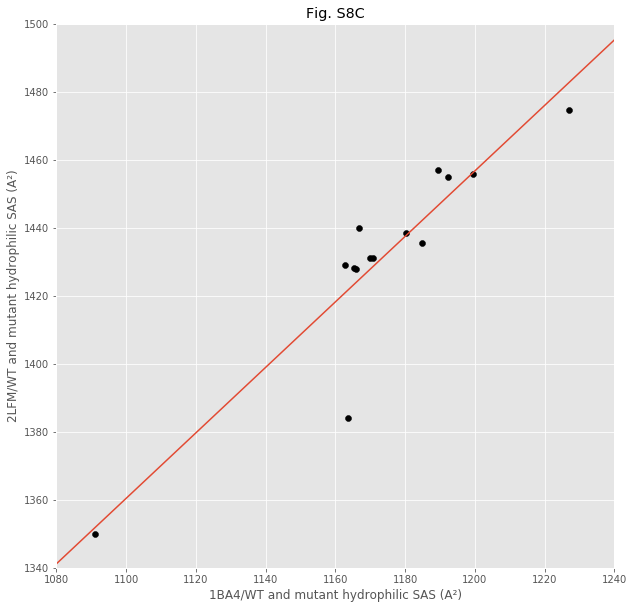

In [295]:
#Figure S8C
_1BA4_hydrophilic_SAS = _1BA4_hydro_SAS[:, 1]
_2LFM_hydrophilic_SAS = _2LFM_hydro_SAS[:, 1]

# Plot data
plt.figure(figsize = (10, 10))
plt.scatter(_1BA4_hydrophilic_SAS, _2LFM_hydrophilic_SAS, c = 'k')
x_limits_fig_s8c = np.array([1080,1240])

# Generate Model
guess_params_fig_8c = generate_linear_params(_1BA4_hydrophilic_SAS, _2LFM_hydrophilic_SAS)
model_fig_8c = generate_linear_model(_1BA4_hydrophilic_SAS, _2LFM_hydrophilic_SAS, guess_params_fig_8c, residuals_OLS)

# Plot Model
plt.plot(x_limits_fig_s8c, generate_linear_y(x_limits_fig_s8c, model_fig_8c))

#Set axis limits
axis = plt.gca()
axis.set_xlim(x_limits_fig_s8c)
axis.set_ylim([1340,1500])

#Labels
plt.xlabel('1BA4/WT and mutant hydrophilic SAS (A²)')
plt.ylabel('2LFM/WT and mutant hydrophilic SAS (A²)')
plt.title('Fig. S8C')

plt.show()

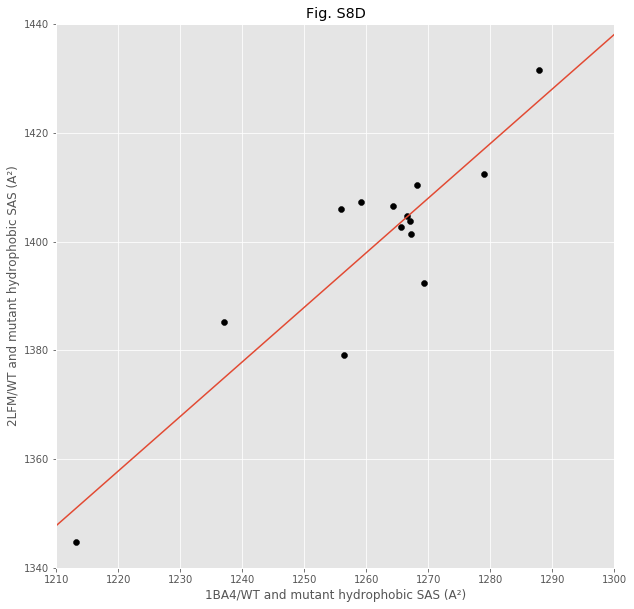

In [296]:
#Figure S8D

# Plot data
plt.figure(figsize = (10, 10))
plt.scatter(_1BA4_hydrophobic_SAS, _2LFM_hydrophobic_SAS, c = 'k')
x_limits_fig_s8d = np.array([1210,1300])

# Generate Model
guess_params_fig_8d = generate_linear_params(_1BA4_hydrophobic_SAS, _2LFM_hydrophobic_SAS)
model_fig_8d = generate_linear_model(_1BA4_hydrophobic_SAS, _2LFM_hydrophobic_SAS, guess_params_fig_8d, residuals_OLS)

# Plot Model
plt.plot(x_limits_fig_s8d, generate_linear_y(x_limits_fig_s8d, model_fig_8d))

#Set axis limits
axis = plt.gca()
axis.set_xlim(x_limits_fig_s8d)
axis.set_ylim([1340,1440])

#Labels
plt.xlabel('1BA4/WT and mutant hydrophobic SAS (A²)')
plt.ylabel('2LFM/WT and mutant hydrophobic SAS (A²)')
plt.title('Fig. S8D')

plt.show()

#### Upload t_onset with conformation properties and reproduce the plots in Fig. S9 and Fig. S10

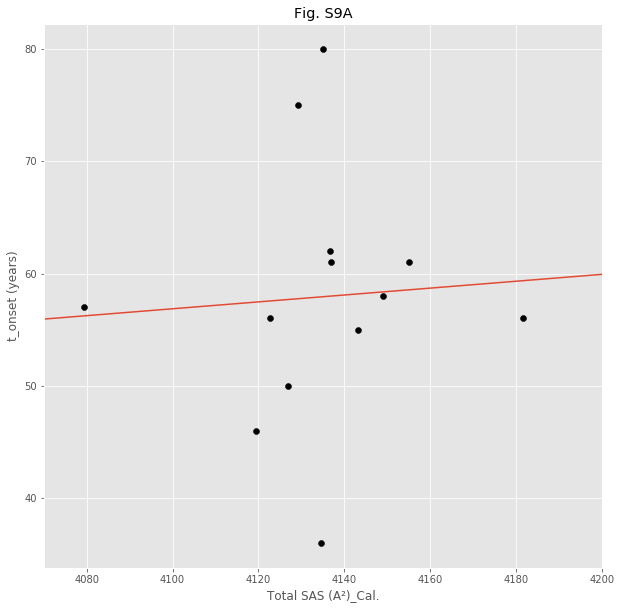

In [297]:
#Figure S9A
_1IYT_t_onset = _1IYT_t_onset_and_prop[:, 0]
_1IYT_total_SAS = _1IYT_t_onset_and_prop[:, 1]

# Plot data
plt.figure(figsize = (10, 10))
plt.scatter(_1IYT_total_SAS, _1IYT_t_onset, c = 'k')
x_limits_fig_s9a = np.array([4070,4200])

# Generate Model
guess_params_fig_9a = generate_linear_params(_1IYT_total_SAS, _1IYT_t_onset)
model_fig_9a = generate_linear_model(_1IYT_total_SAS, _1IYT_t_onset, guess_params_fig_9a, residuals_OLS)

# Plot Model
plt.plot(x_limits_fig_s9a, generate_linear_y(x_limits_fig_s9a, model_fig_9a))

#Set axis limits
axis = plt.gca()
axis.set_xlim(x_limits_fig_s9a)

#Labels
plt.xlabel('Total SAS (A²)_Cal.')
plt.ylabel('t_onset (years)')
plt.title('Fig. S9A')

plt.show()

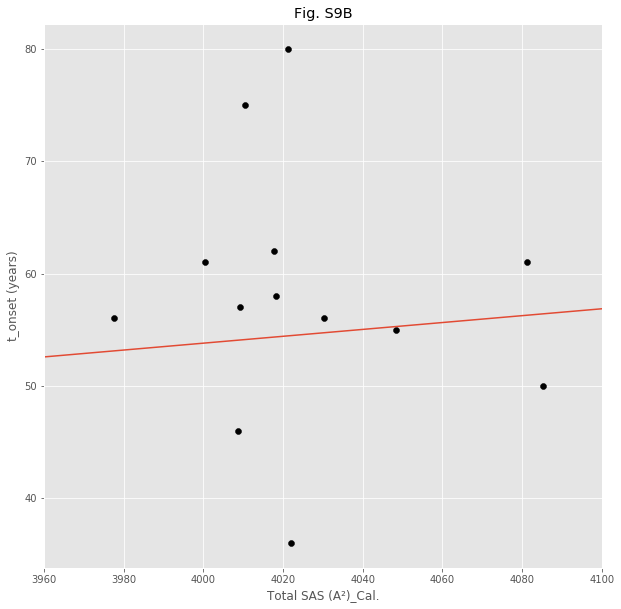

In [298]:
#Figure 9b
_1Z0Q_t_onset = _1Z0Q_t_onset_and_prop[:, 0]
_1Z0Q_total_SAS = _1Z0Q_t_onset_and_prop[:, 1]

# Plot data
plt.figure(figsize = (10, 10))
plt.scatter(_1Z0Q_total_SAS, _1Z0Q_t_onset, c = 'k')
x_limits_fig_s9b = np.array([3960,4100])

# Generate Model
guess_params_fig_9b = generate_linear_params(_1IYT_total_SAS, _1IYT_t_onset)
model_fig_9b = generate_linear_model(_1IYT_total_SAS, _1IYT_t_onset, guess_params_fig_9b, residuals_OLS)

# Plot Model
plt.plot(x_limits_fig_s9b, generate_linear_y(x_limits_fig_s9b, model_fig_9b))

#Set axis limits
axis = plt.gca()
axis.set_xlim(x_limits_fig_s9b)

#Labels
plt.xlabel('Total SAS (A²)_Cal.')
plt.ylabel('t_onset (years)')
plt.title('Fig. S9B')

plt.show()

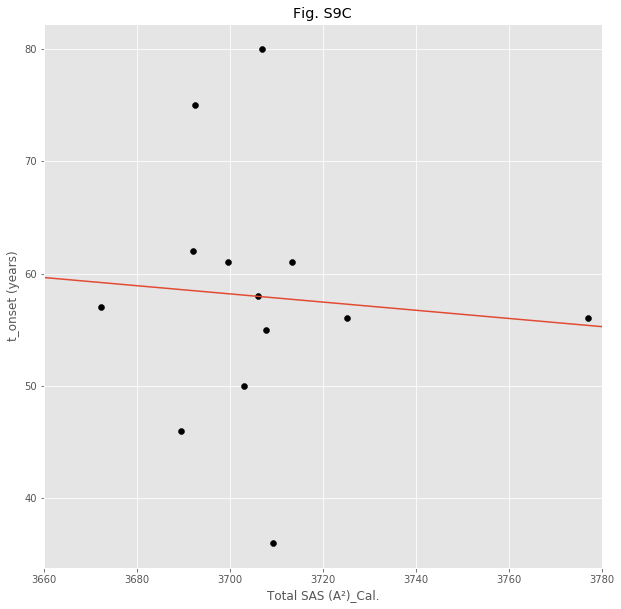

In [299]:
#Figure 9c
_1BA4_t_onset = _1BA4_t_onset_and_prop[:, 0]
_1BA4_total_SAS = _1BA4_t_onset_and_prop[:, 1]

# Plot data
plt.figure(figsize = (10, 10))
plt.scatter(_1BA4_total_SAS, _1BA4_t_onset, c = 'k')
x_limits_fig_s9c = np.array([3660,3780])

# Generate Model
guess_params_fig_9c = generate_linear_params(_1BA4_total_SAS, _1BA4_t_onset)
model_fig_9c = generate_linear_model(_1BA4_total_SAS, _1BA4_t_onset, guess_params_fig_9c, residuals_OLS)

# Plot Model
plt.plot(x_limits_fig_s9c, generate_linear_y(x_limits_fig_s9c, model_fig_9c))

#Set axis limits
axis = plt.gca()
axis.set_xlim(x_limits_fig_s9c)

#Labels
plt.xlabel('Total SAS (A²)_Cal.')
plt.ylabel('t_onset (years)')
plt.title('Fig. S9C')

plt.show()

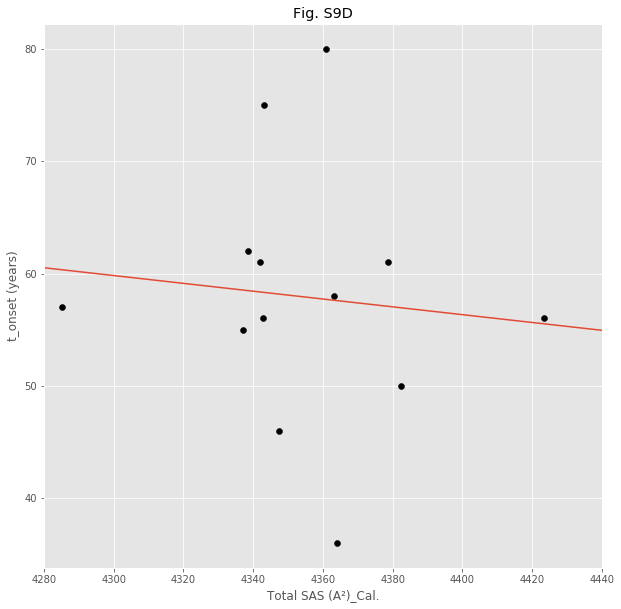

In [300]:
#Figure 9d
_2LFM_t_onset = _2LFM_t_onset_and_prop[:, 0]
_2LFM_total_SAS = _2LFM_t_onset_and_prop[:, 1]

# Plot data
plt.figure(figsize = (10, 10))
plt.scatter(_2LFM_total_SAS, _2LFM_t_onset, c = 'k')
x_limits_fig_s9d = np.array([4280,4440])

# Generate Model
guess_params_fig_9d = generate_linear_params(_2LFM_total_SAS, _2LFM_t_onset)
model_fig_9d = generate_linear_model(_2LFM_total_SAS, _2LFM_t_onset, guess_params_fig_9d, residuals_OLS)

# Plot Model
plt.plot(x_limits_fig_s9d, generate_linear_y(x_limits_fig_s9d, model_fig_9d))

#Set axis limits
axis = plt.gca()
axis.set_xlim(x_limits_fig_s9d)

#Labels
plt.xlabel('Total SAS (A²)_Cal.')
plt.ylabel('t_onset (years)')
plt.title('Fig. S9D')

plt.show()

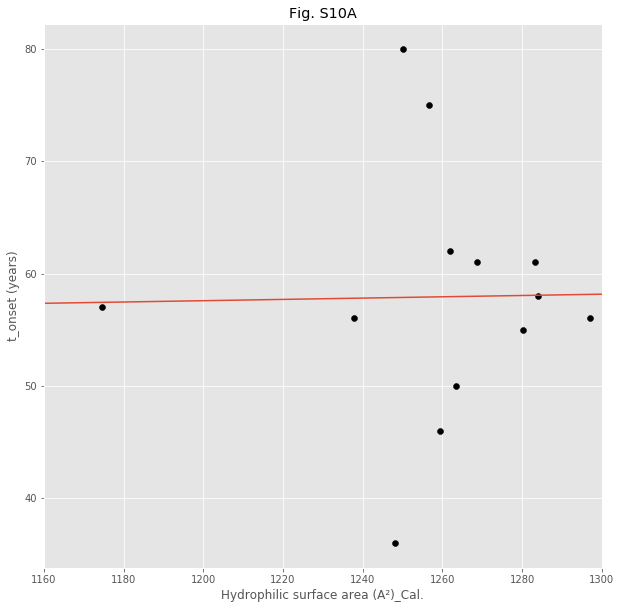

In [301]:
#Figure 10a
_1IYT_t_onset = _1IYT_t_onset_and_prop[:,0]
_1IYT_hydrophilic_SAS_2 = _1IYT_t_onset_and_prop[:,3]

# Plot data
plt.figure(figsize = (10, 10))
plt.scatter(_1IYT_hydrophilic_SAS_2, _1IYT_t_onset, c = 'k')
x_limits_fig_s10a = np.array([1160,1300])

# Generate Model
guess_params_fig_10a = generate_linear_params(_1IYT_hydrophilic_SAS_2, _1IYT_t_onset)
model_fig_10a = generate_linear_model(_1IYT_hydrophilic_SAS_2, _1IYT_t_onset, guess_params_fig_10a, residuals_OLS)

# Plot Model
plt.plot(x_limits_fig_s10a, generate_linear_y(x_limits_fig_s10a, model_fig_10a))

#Set axis limits
axis = plt.gca()
axis.set_xlim(x_limits_fig_s10a)

#Labels
plt.xlabel('Hydrophilic surface area (A²)_Cal.')
plt.ylabel('t_onset (years)')
plt.title('Fig. S10A')

plt.show()

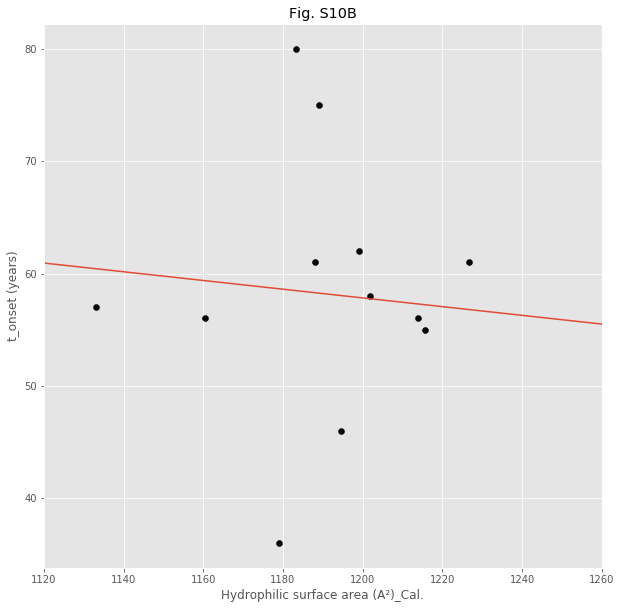

In [302]:
#Figure 10b
_1Z0Q_t_onset = _1Z0Q_t_onset_and_prop[:,0]
_1Z0Q_hydrophilic_SAS_2 = _1Z0Q_t_onset_and_prop[:,3]

# Plot data
plt.figure(figsize = (10, 10))
plt.scatter(_1Z0Q_hydrophilic_SAS_2, _1Z0Q_t_onset, c = 'k')
x_limits_fig_s10b = np.array([1120,1260])

# Generate Model
guess_params_fig_10b = generate_linear_params(_1Z0Q_hydrophilic_SAS_2, _1Z0Q_t_onset)
model_fig_10b = generate_linear_model(_1Z0Q_hydrophilic_SAS_2, _1Z0Q_t_onset, guess_params_fig_10b, residuals_OLS)

# Plot Model
plt.plot(x_limits_fig_s10b, generate_linear_y(x_limits_fig_s10b, model_fig_10b))

#Set axis limits
axis = plt.gca()
axis.set_xlim(x_limits_fig_s10b)

#Labels
plt.xlabel('Hydrophilic surface area (A²)_Cal.')
plt.ylabel('t_onset (years)')
plt.title('Fig. S10B')

plt.show()

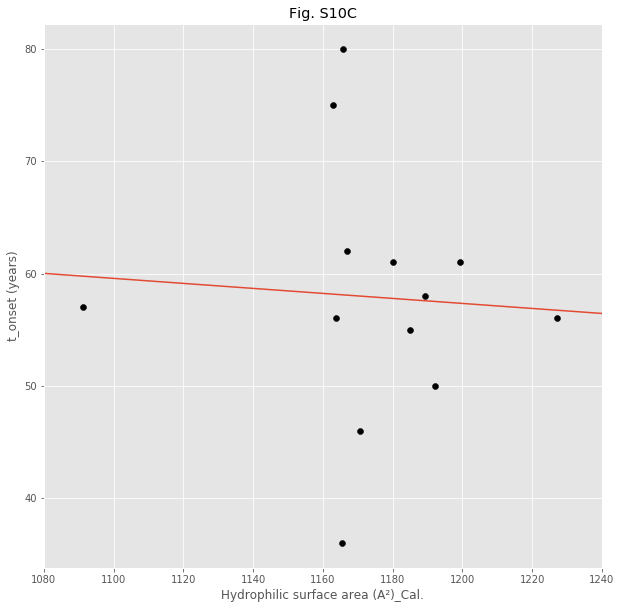

In [303]:
#Figure 10c
_1BA4_t_onset = _1BA4_t_onset_and_prop[:, 0]
_1BA4_hydrophilic_SAS_2 = _1BA4_t_onset_and_prop[:, 3]

# Plot data
plt.figure(figsize = (10, 10))
plt.scatter(_1BA4_hydrophilic_SAS_2, _1BA4_t_onset, c = 'k')
x_limits_fig_s10c = np.array([1080,1240])

# Generate Model
guess_params_fig_10c = generate_linear_params(_1BA4_hydrophilic_SAS_2, _1BA4_t_onset)
model_fig_10c = generate_linear_model(_1BA4_hydrophilic_SAS_2, _1BA4_t_onset, guess_params_fig_10c, residuals_OLS)

# Plot Model
plt.plot(x_limits_fig_s10c, generate_linear_y(x_limits_fig_s10c, model_fig_10c))

#Set axis limits
axis = plt.gca()
axis.set_xlim(x_limits_fig_s10c)

#Labels
plt.xlabel('Hydrophilic surface area (A²)_Cal.')
plt.ylabel('t_onset (years)')
plt.title('Fig. S10C')

plt.show()

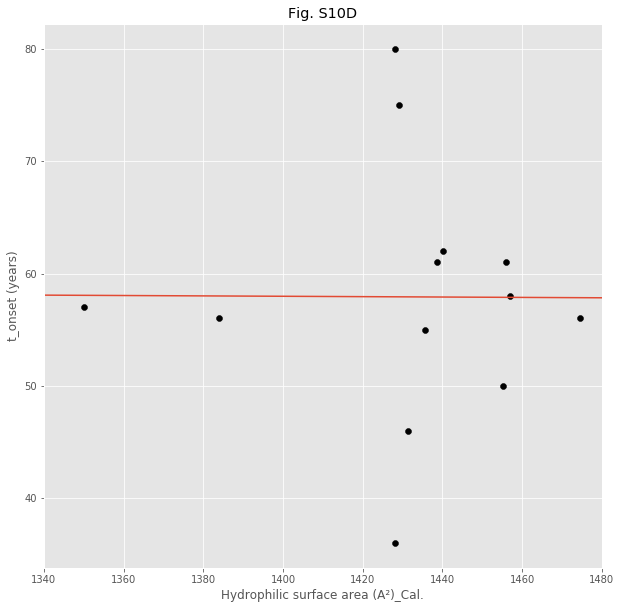

In [304]:
#Figure 10d
_2LFM_t_onset = _2LFM_t_onset_and_prop[:, 0]
_2LFM_hydrophilic_SAS_2 = _2LFM_t_onset_and_prop[:, 3]

# Plot data
plt.figure(figsize = (10, 10))
plt.scatter(_2LFM_hydrophilic_SAS_2, _2LFM_t_onset, c = 'k')
x_limits_fig_s10d = np.array([1340,1480])

# Generate Model
guess_params_fig_10d = generate_linear_params(_2LFM_hydrophilic_SAS_2, _2LFM_t_onset)
model_fig_10d = generate_linear_model(_2LFM_hydrophilic_SAS_2, _2LFM_t_onset, guess_params_fig_10d, residuals_OLS)

# Plot Model
plt.plot(x_limits_fig_s10d, generate_linear_y(x_limits_fig_s10d, model_fig_10d))

#Set axis limits
axis = plt.gca()
axis.set_xlim(x_limits_fig_s10d)

#Labels
plt.xlabel('Hydrophilic surface area (A²)_Cal.')
plt.ylabel('t_onset (years)')
plt.title('Fig. S10D')

plt.show()

#### Reproduce the plots in Fig. S11 and Fig. S12

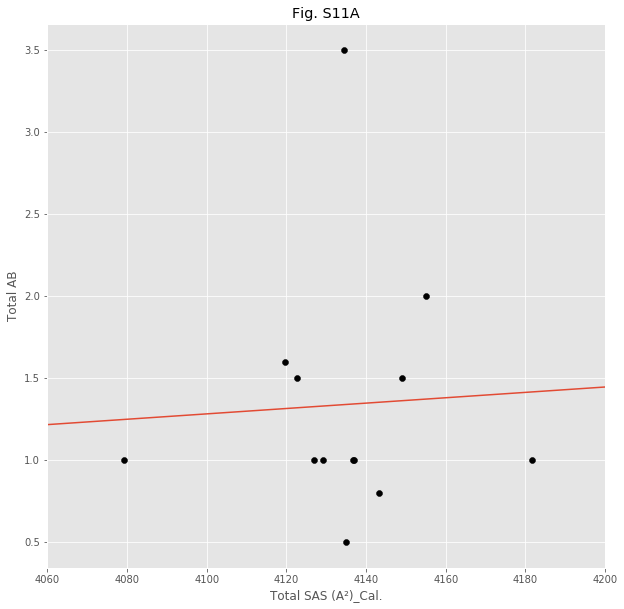

In [305]:
#Figure 11a
_1IYT_total_AB_2 = _1IYT_tot_AB_and_prop[:, 0]
_1IYT_total_SAS_2 = _1IYT_tot_AB_and_prop[:, 1]

# Plot data
plt.figure(figsize = (10, 10))
plt.scatter(_1IYT_total_SAS_2, _1IYT_total_AB_2, c = 'k')
x_limits_fig_s11a = np.array([4060,4200])

# Generate Model
guess_params_fig_11a = generate_linear_params(_1IYT_total_SAS_2, _1IYT_total_AB_2)
model_fig_11a = generate_linear_model(_1IYT_total_SAS_2, _1IYT_total_AB_2, guess_params_fig_11a, residuals_OLS)

# Plot Model
plt.plot(x_limits_fig_s11a, generate_linear_y(x_limits_fig_s11a, model_fig_11a))

#Set axis limits
axis = plt.gca()
axis.set_xlim(x_limits_fig_s11a)

#Labels
plt.xlabel('Total SAS (A²)_Cal.')
plt.ylabel('Total AB')
plt.title('Fig. S11A')

plt.show()

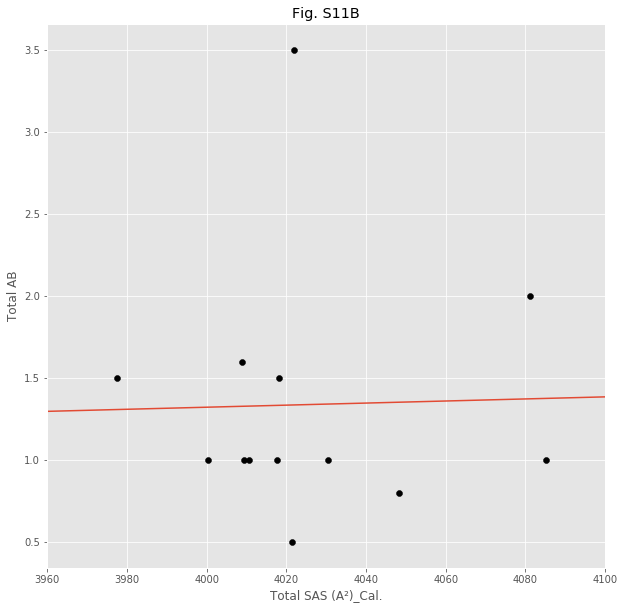

In [306]:
#Figure 11b
_1Z0Q_total_AB_2 = _1Z0Q_tot_AB_and_prop[:, 0]
_1Z0Q_total_SAS_2 = _1Z0Q_tot_AB_and_prop[:, 1]

# Plot data
plt.figure(figsize = (10, 10))
plt.scatter(_1Z0Q_total_SAS_2, _1Z0Q_total_AB_2, c = 'k')
x_limits_fig_s11b = np.array([3960,4100])

# Generate Model
guess_params_fig_11b = generate_linear_params(_1Z0Q_total_SAS_2, _1Z0Q_total_AB_2)
model_fig_11b = generate_linear_model(_1Z0Q_total_SAS_2, _1Z0Q_total_AB_2, guess_params_fig_11b, residuals_OLS)

# Plot Model
plt.plot(x_limits_fig_s11b, generate_linear_y(x_limits_fig_s11b, model_fig_11b))

#Set axis limits
axis = plt.gca()
axis.set_xlim(x_limits_fig_s11b)

#Labels
plt.xlabel('Total SAS (A²)_Cal.')
plt.ylabel('Total AB')
plt.title('Fig. S11B')

plt.show()

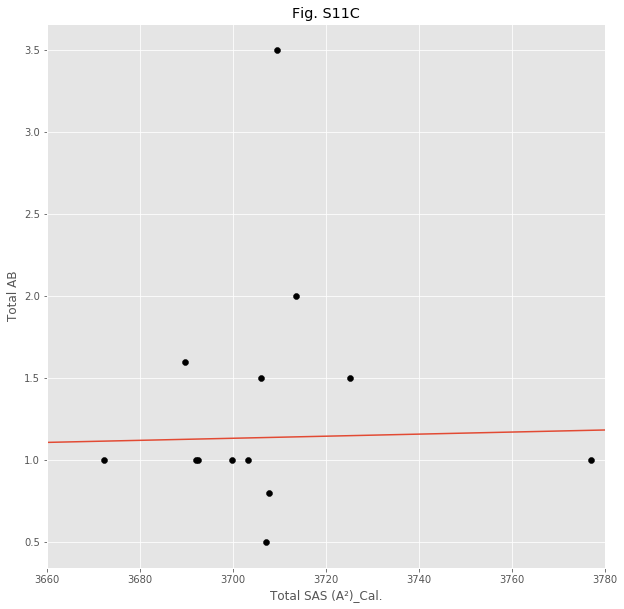

In [307]:
#Figure 11c
_1BA4_total_AB_2 = _1BA4_tot_AB_and_prop[:, 0]
_1BA4_total_SAS_2 = _1BA4_tot_AB_and_prop[:, 1]

# Plot data
plt.figure(figsize = (10, 10))
plt.scatter(_1BA4_total_SAS_2, _1BA4_total_AB_2, c = 'k')
x_limits_fig_s11c = np.array([3660,3780])

# Generate Model
guess_params_fig_11c = generate_linear_params(_1Z0Q_total_SAS_2, _1Z0Q_total_AB_2)
model_fig_11c = generate_linear_model(_1Z0Q_total_SAS_2, _1Z0Q_total_AB_2, guess_params_fig_11c, residuals_OLS)

# Plot Model
plt.plot(x_limits_fig_s11c, generate_linear_y(x_limits_fig_s11c, model_fig_11c))

#Set axis limits
axis = plt.gca()
axis.set_xlim(x_limits_fig_s11c)

#Labels
plt.xlabel('Total SAS (A²)_Cal.')
plt.ylabel('Total AB')
plt.title('Fig. S11C')

plt.show()

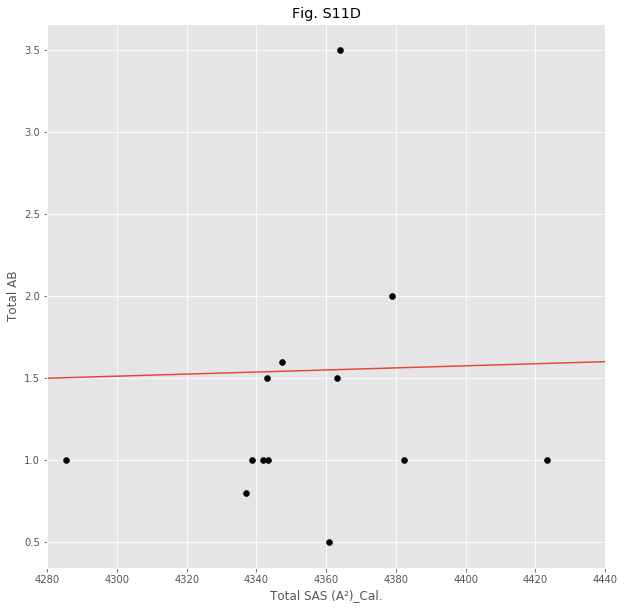

In [308]:
#Figure 11d
_2LFM_total_AB_2 = _2LFM_tot_AB_and_prop[:, 0]
_2LFM_total_SAS_2 = _2LFM_tot_AB_and_prop[:, 1]

# Plot data
plt.figure(figsize = (10, 10))
plt.scatter(_2LFM_total_SAS_2, _2LFM_total_AB_2, c = 'k')
x_limits_fig_s11d = np.array([4280,4440])

# Generate Model
guess_params_fig_11d = generate_linear_params(_1Z0Q_total_SAS_2, _1Z0Q_total_AB_2)
model_fig_11d = generate_linear_model(_1Z0Q_total_SAS_2, _1Z0Q_total_AB_2, guess_params_fig_11d, residuals_OLS)

# Plot Model
plt.plot(x_limits_fig_s11d, generate_linear_y(x_limits_fig_s11d, model_fig_11d))

#Set axis limits
axis = plt.gca()
axis.set_xlim(x_limits_fig_s11d)

#Labels
plt.xlabel('Total SAS (A²)_Cal.')
plt.ylabel('Total AB')
plt.title('Fig. S11D')

plt.show()

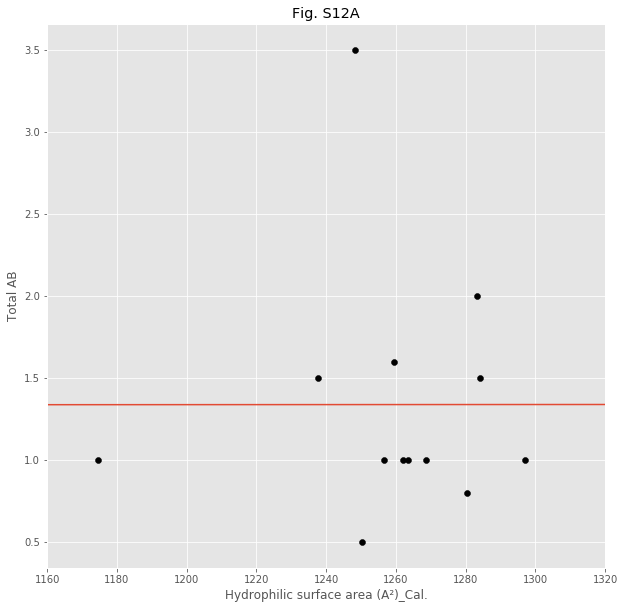

In [309]:
#Figure 12a
_1IYT_total_AB = _1IYT_tot_AB_and_prop[:,0]
_1IYT_hydrophilic_SAS = _1IYT_tot_AB_and_prop[:,3]

# Plot data
plt.figure(figsize = (10, 10))
plt.scatter(_1IYT_hydrophilic_SAS, _1IYT_total_AB, c = 'k')
x_limits_fig_s12a = np.array([1160,1320])

# Generate Model
guess_params_fig_12a = generate_linear_params(_1IYT_hydrophilic_SAS, _1IYT_total_AB)
model_fig_12a = generate_linear_model(_1IYT_hydrophilic_SAS, _1IYT_total_AB, guess_params_fig_12a, residuals_OLS)

# Plot Model
plt.plot(x_limits_fig_s12a, generate_linear_y(x_limits_fig_s12a, model_fig_12a))

#Set axis limits
axis = plt.gca()
axis.set_xlim(x_limits_fig_s12a)

#Labels
plt.xlabel('Hydrophilic surface area (A²)_Cal.')
plt.ylabel('Total AB')
plt.title('Fig. S12A')

plt.show()

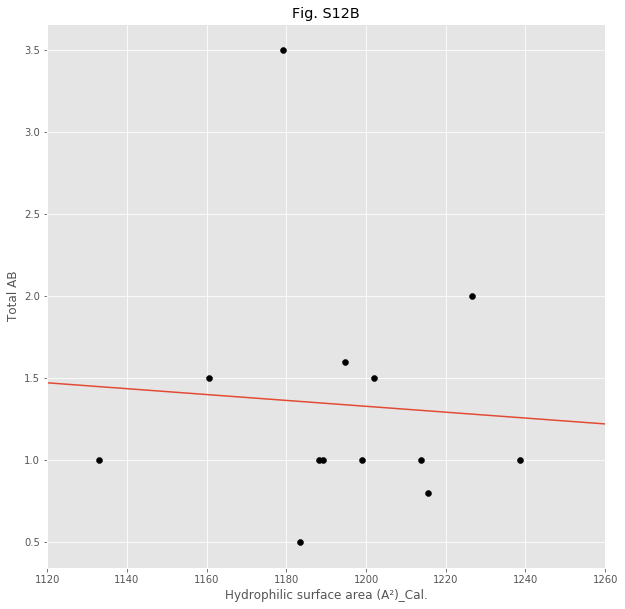

In [310]:
#Figure 12b
_1Z0Q_total_AB = _1Z0Q_tot_AB_and_prop[:,0]
_1Z0Q_hydrophilic_SAS = _1Z0Q_tot_AB_and_prop[:,3]

# Plot data
plt.figure(figsize = (10, 10))
plt.scatter(_1Z0Q_hydrophilic_SAS, _1Z0Q_total_AB, c = 'k')
x_limits_fig_s12b = np.array([1120,1260])

# Generate Model
guess_params_fig_12b = generate_linear_params(_1Z0Q_hydrophilic_SAS, _1Z0Q_total_AB)
model_fig_12b = generate_linear_model(_1Z0Q_hydrophilic_SAS, _1Z0Q_total_AB, guess_params_fig_12b, residuals_OLS)

# Plot Model
plt.plot(x_limits_fig_s12b, generate_linear_y(x_limits_fig_s12b, model_fig_12b))

#Set axis limits
axis = plt.gca()
axis.set_xlim(x_limits_fig_s12b)

#Labels
plt.xlabel('Hydrophilic surface area (A²)_Cal.')
plt.ylabel('Total AB')
plt.title('Fig. S12B')

plt.show()

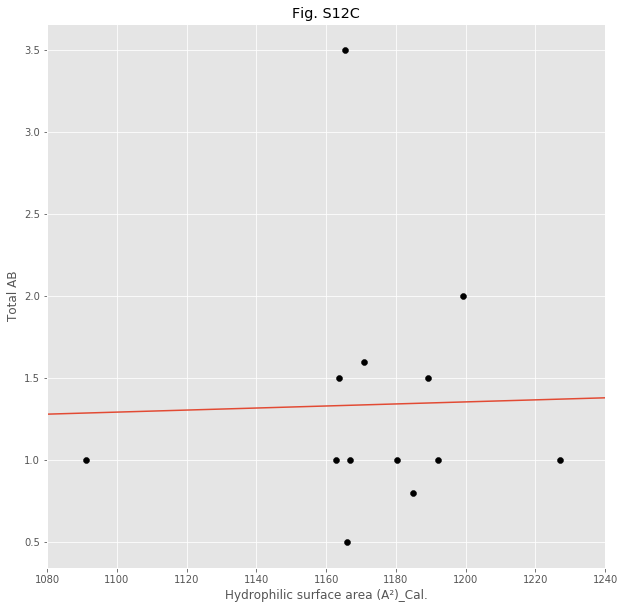

In [311]:
#Figure 12c
_1BA4_total_AB = _1BA4_tot_AB_and_prop[:,0]
_1BA4_hydrophilic_SAS = _1BA4_tot_AB_and_prop[:,3]

# Plot data
plt.figure(figsize = (10, 10))
plt.scatter(_1BA4_hydrophilic_SAS, _1BA4_total_AB, c = 'k')
x_limits_fig_s12c = np.array([1080,1240])

# Generate Model
guess_params_fig_12c = generate_linear_params(_1BA4_hydrophilic_SAS, _1BA4_total_AB)
model_fig_12c = generate_linear_model(_1BA4_hydrophilic_SAS, _1BA4_total_AB, guess_params_fig_12c, residuals_OLS)

# Plot Model
plt.plot(x_limits_fig_s12c, generate_linear_y(x_limits_fig_s12c, model_fig_12c))

#Set axis limits
axis = plt.gca()
axis.set_xlim(x_limits_fig_s12c)

#Labels
plt.xlabel('Hydrophilic surface area (A²)_Cal.')
plt.ylabel('Total AB')
plt.title('Fig. S12C')

plt.show()

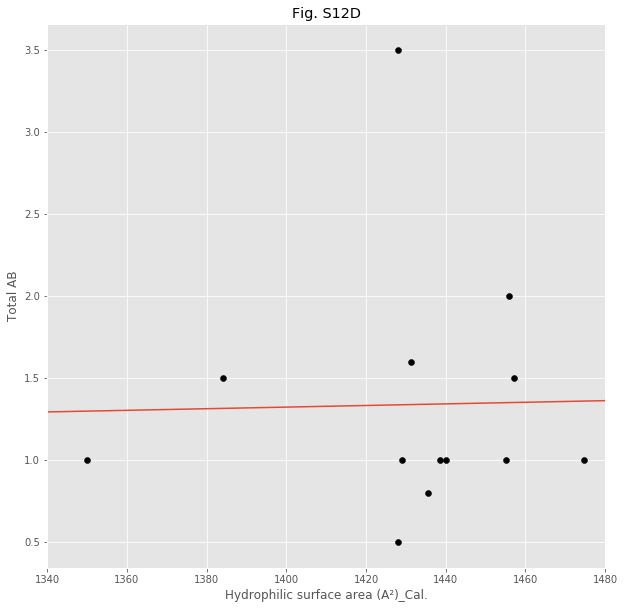

In [312]:
#Figure 12d
_2LFM_total_AB = _2LFM_tot_AB_and_prop[:,0]
_2LFM_hydrophilic_SAS = _2LFM_tot_AB_and_prop[:,3]

# Plot data
plt.figure(figsize = (10, 10))
plt.scatter(_2LFM_hydrophilic_SAS, _2LFM_total_AB, c = 'k')
x_limits_fig_s12d = np.array([1340,1480])

# Generate Model
guess_params_fig_12d = generate_linear_params(_2LFM_hydrophilic_SAS, _2LFM_total_AB)
model_fig_12d = generate_linear_model(_2LFM_hydrophilic_SAS, _2LFM_total_AB, guess_params_fig_12d, residuals_OLS)

# Plot Model
plt.plot(x_limits_fig_s12d, generate_linear_y(x_limits_fig_s12d, model_fig_12d))

#Set axis limits
axis = plt.gca()
axis.set_xlim(x_limits_fig_s12d)

#Labels
plt.xlabel('Hydrophilic surface area (A²)_Cal.')
plt.ylabel('Total AB')
plt.title('Fig. S12D')

plt.show()